# Rainfall Whether Forecasting

Rainfall Weather Forecasting 

Project Description 

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change. 

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things: 

  

1. Problem Statement:  

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow. 

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there. 

 
 

Dataset Description: 

Number of columns: 23 

 
 

Date  - The date of observation 

Location  -The common name of the location of the weather station 

MinTemp  -The minimum temperature in degrees celsius 

MaxTemp -The maximum temperature in degrees celsius 

Rainfall  -The amount of rainfall recorded for the day in mm 

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am 

Sunshine  -The number of hours of bright sunshine in the day. 

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight 

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight 

WindDir9am -Direction of the wind at 9am 

WindDir3pm -Direction of the wind at 3pm 

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am 

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm 

Humidity9am -Humidity (percent) at 9am 

Humidity3pm -Humidity (percent) at 3pm 

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am 

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm 

Cloud9am - Fraction of sky obscured by cloud at 9am.  

Cloud3pm -Fraction of sky obscured by cloud  

Temp9am-Temperature (degrees C) at 9am 

Temp3pm -Temperature (degrees C) at 3pm 

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk". 

 

Dataset Link-   

https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv 

https://github.com/dsrscientist/dataset3 

 

In [25]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:


url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
df = pd.read_csv(url)


In [3]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
#There may presence of NULL VLAUES in our dataset.
# no. of columns with 'object' datatype is = 07
# no. of columns with 'float' datatype is = 16
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
column = ['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
 'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
 'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
 'temp3pm', 'raintoday', 'raintomorrow']

In [8]:
df.columns=column

In [9]:
df.columns
# here below we put all column names in small latter for convinience.


Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [39]:
df.shape


(8425, 23)

There are 8,425 rows and 23 columns are present in our dataset.


In [40]:
df.dtypes

date              object
location          object
mintemp          float64
maxtemp          float64
rainfall         float64
evaporation      float64
sunshine         float64
windgustdir       object
windgustspeed    float64
winddir9am        object
winddir3pm        object
windSpeed9am     float64
windSpeed3pm     float64
humidity9am      float64
humidity3pm      float64
pressure9am      float64
pressure3pm      float64
cloud9am         float64
cloud3pm         float64
temp9am          float64
temp3pm          float64
raintoday         object
raintomorrow      object
dtype: object

Here,we find that there are 2 types of data is present inside our dataset i.e = 'object' & 'float'

In [42]:
df.isnull().sum()
# here below we can find the presence of null vlaues in our dataset, every column is having NULL VALUE except DATE & LOCATION.
# EVEN TARGET COLUMNS ARE ALSO HAVING NULL VALUES = "RainTomorrow" & "Rainfall"

date                0
location            0
mintemp            75
maxtemp            60
rainfall          240
evaporation      3512
sunshine         3994
windgustdir       991
windgustspeed     991
winddir9am        829
winddir3pm        308
windSpeed9am       76
windSpeed3pm      107
humidity9am        59
humidity3pm       102
pressure9am      1309
pressure3pm      1312
cloud9am         2421
cloud3pm         2455
temp9am            56
temp3pm            96
raintoday         240
raintomorrow      239
dtype: int64

CHECKING NUL VALUES WITH THE HELP OF HEATMAP :-

<AxesSubplot:>

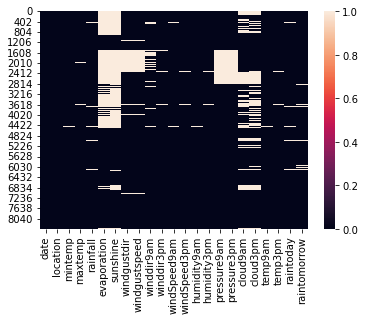

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())

Here inthe heatmap also we can clearly find the presence of null values inside the dataframe.

So from above analysis we can find that there is a presence of NULL VALUES in our dataset. so we have to replace them with\nth
e appropriate value. '
Now we will try to replace NULL values

In [44]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [10]:
for i in df.columns:
 null_positions = np.where(df[i].isnull())[0]
 print("Null positions in column:", null_positions)

Null positions in column: []
Null positions in column: []
Null positions in column: [ 284  444  453  459  612 1189 1518 1562 1563 1565 1597 1612 1658 1661
 1667 1685 1697 1717 1722 1736 1737 1738 1739 1756 1765 1813 1814 1815
 1816 1817 1818 1827 1837 1851 1928 1954 1960 1975 1987 2033 2069 2082
 2111 2127 2134 2163 2164 2165 2166 2167 2168 2175 2199 2200 2201 2208
 2228 2235 2247 2273 2282 2289 2291 2297 2902 3437 3438 3439 3614 3754
 4289 4290 4291 4466 6495]
Null positions in column: [ 283  452  455  458  464 1188 1561 1562 1611 1657 1716 1725 1735 1736
 1737 1738 1755 1764 1812 1813 1814 1815 1816 1817 1826 1836 1850 1913
 1953 1986 2068 2081 2126 2133 2162 2163 2164 2165 2166 2167 2174 2198
 2199 2207 2227 2234 2286 2288 2290 2303 2304 2319 3437 3438 3613 4289
 4290 4465 6495 8424]
Null positions in column: [  15  284  436  438  444  453  456  465  612  929 1812 1813 1814 1815
 1816 1817 1818 2069 2164 2165 2166 2167 2199 2200 2460 2506 2679 2825
 2826 2839 2840 2846 2847 2848 297

here from the above we can find that the NULL-VALUES are present in the column at what positions / index number.
so firt we have to check them...

So upto here from the above analysis we can find that the columns in which NULL VLAUES are present are all in "Folat"\ndataty
pes, except "windgudtdir", "winddir9am", "winddir3pm", "raintoday", & "raintomorrow" are in OBJECT datatype.

In [11]:
#To Replace the Null-Values from the dataset, we have to import Simple IMputer Library
from sklearn.impute import SimpleImputer

In [12]:
imp = SimpleImputer(strategy="mean")
imp1 = SimpleImputer(strategy="most_frequent")

1. Can only use these strategies: ['mean', 'median', 'most_frequent', 'constant'] got strategy=mostfrequent
2. here for the 'float' datatype columns, we can replace the NULL VALUES with the MEAN of that column.
3. and for 'string/object' datatype columns, we can replace the NULL VALUES with "MODE/ MOST FREQUENT" of that column.
4. we can replace the null values with the 'MEAN' values present in the columns.
so the null values can be replaced by the MEAN values ARRIVED in the column.

In [13]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [14]:
float_nan_columns = ['mintemp', 'maxtemp', 'rainfall', 'evaporation',
 'sunshine','windgustspeed','windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
 'temp3pm']

In [15]:
object_nan_columns = ['windgustdir', 'winddir9am', 'winddir3pm','raintoday', 'raintomorrow']

In [20]:
# Here we are Replacing all Nan Values Column Together with their Mean of the columns, by using "FOR LOOP"
for i in float_nan_columns:
    df[i]= imp.fit_transform(df[i].values.reshape(-1,1))

In [21]:
# Here we are Replacing all Nan Values Column Together with their Mode/Most Frequent of the columns, by using "FOR LOOP"
for i in object_nan_columns:
    df[i]= imp1.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df.isnull().sum()
# here below we can succesfully replaced all the null values with their appropriate substitues.

date             0
location         0
mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windSpeed9am     0
windSpeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
dtype: int64

Now there is no NUll values in the dataset

<AxesSubplot:>

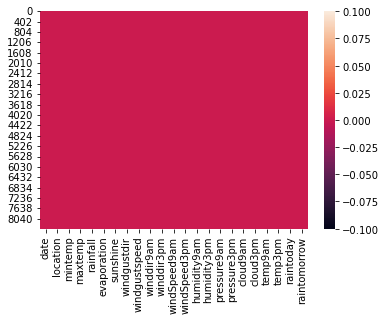

In [26]:
# with the help of heatmap also we can clearly seen absence of NULL VALUES , in the following columns of dataset
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())

In [27]:
df['date'].nunique()
# out of total =8425 rows only 3004 dates are unique in the column.

3004

In [28]:
df['date'].min()

'2008-12-01'

In [29]:
df['date'].max()

'2017-06-25'

Obesrvation
1. That means tha data given is in between [ 1st-December-2008 -to- 25-June-2017 ]\n'

In [30]:
df['location'].unique()
# following are the unique names of the locations.

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [31]:
df['location'].nunique()
# there are 12 numbers of unique loacations are present in the given dataset.

12

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


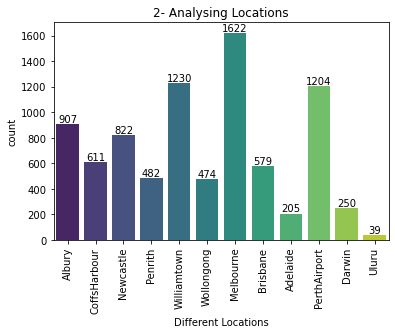

In [32]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('2- Analysing Locations')
ax = sns.countplot(df['location'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Different Locations', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()


**Observations:**
    1. the Maximum Density/Counts is at MelBourn then in WillaimTown and the PerthAirport.
    2. The three minimum density/count is at  Uluru then Adelaide and the in Darwin.

In [33]:
print(df['mintemp'].nunique())
print(df['maxtemp'].nunique())

286
332


Min-Temp. ==> out 8425 values , there are 286 Unique Values of 'Minimum Temperature' are present in the column.
Max-Temp. ==> out of 8425 values, there are 332 Unique Values of 'Maximum Temperature' are present in the column.

In [34]:
print (df['mintemp'].min())
print (df['mintemp'].max())
print (df['mintemp'].mean())

-2.0
28.5
13.193305389221567


**Observations:-** 
1. The LOWEST VALUE of MINMUM TEMPERATURE RECORDED is = -2.0 °C
2. The Highest Minimum Temperature Recorded is = 28.5 °C
3. The MEAN of the total Values Present inside the column of Minimum Temperature is = 13.19 °C

In [35]:
print (df['maxtemp'].min())
print (df['maxtemp'].max())
print (df['maxtemp'].mean())

8.2
45.5
23.859976090854737


**Obseravtions:-**
1. The LOWEST VALUE of MAXIMUM TEMPERATURE RECORDED is = 8.2 °C
2. The Highest MAXIMUM Temperature Recorded is = 45.5 °C
3. The MEAN of the total Values Present inside the column of MAXIMUM Temperature is = 23.85 °C
4. Minimum (lowest) to Maximum (highest) Temperature of Enviornment during the Period is = -2.0 °C -to- 45.5 °
  that means in WINTERS the temperature goes very down till (-2.0 °C) VERYMUCH COLDEST IN WINTERS\nand in SUMMERS the temper
  ature goes very high till (45.5 °C) VERYMUCH HOTTEST IN SUMMERS.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


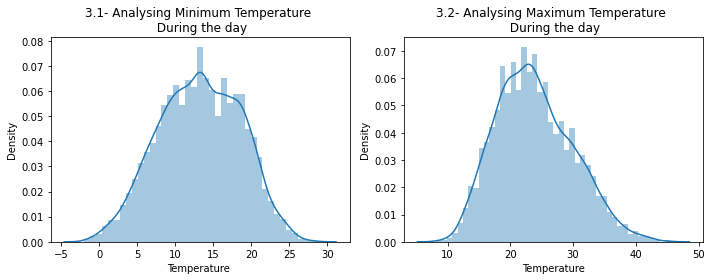

In [36]:
plt.figure(figsize = (10,4), facecolor='white')
plt.subplot (1,2,1)
plt.title('3.1- Analysing Minimum Temperature \n During the day')
sns.distplot(df['mintemp'])
plt.xlabel('Temperature ', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (1,2,2)
plt.title('3.2- Analysing Maximum Temperature \n During the day')
sns.distplot(df['maxtemp'])
plt.xlabel('Temperature', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.tight_layout()
plt.show()


**Observations:-** 
    1.Here from the above Histogram we find that most the time during the day, Minimum Temperature is lying in
b/w 10-15 °C.
2. therefor above we also found the MEAN /AVERAGE of Minimum temperature is = (13.19°C).
3. The Lowest Minimum Temperature on any day is = -2.0 °C.
4. And most of the time the Maxium Temperature during the day is lying in b/w =18 -25 °C.
5. Therefore above we also calculate the MEAN /AVERAGE of Maximum temperature is = (23.85 °C).
6. The Highest Maximum Temperature on any day is = 45.5 °C. 

Analyzing Rainfall

In [37]:
df['rainfall'].nunique()

251

1. Here the data of rainfall present in (mm)
2. Out of total 8425 vlaues there are 251 unique values are present in the given dataset.

In [38]:
print (df['rainfall'].min())
print (df['rainfall'].max())
print (df['rainfall'].mean())

0.0
371.0
2.805913255956055


1. The lowest of rainfall recorded is = 0.00 MM
2. The Highest rainfall during DAY Recorded is = 371 MM (14.60 Inches rainfall in a SINGLE DAY, it is a very HUGE AMOUNT)
3. The Mean/Average of the total RAINFALL DATA Present inside the column of RAINFALL is = 2.80 MM '''

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


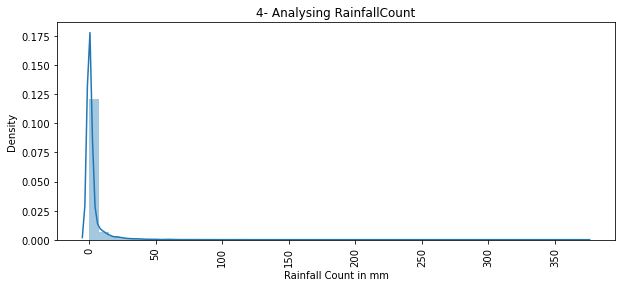

In [39]:
plt.figure(figsize = (10,4), facecolor='white')
plt.title('4- Analysing RainfallCount')
sns.distplot(df['rainfall'])
plt.xlabel('Rainfall Count in mm', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

**Obseravtion:-**
1. Here in the above histogram we find that MAXIMUM number of Counts are are lying in between 0-10 mm
 that means at most of the time the rainfall is in b/w 0-10 mm only.
2. but we are also having highest values till above = 350 mm
 that means on some of few days the rainfall is highest till 370 mm in a day.

Analysing Evopration 

In [40]:
df['evaporation'].nunique()

117

In [41]:
print (df['evaporation'].min())
print (df['evaporation'].max())
print (df['evaporation'].mean())
# the minimum evaporation during a day is 0.0 mm
# the Maximum evaporation during a day is 145 mm
# the mean / average evaporation of a any is 5.38 mm

0.0
145.0
5.389395481375852


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


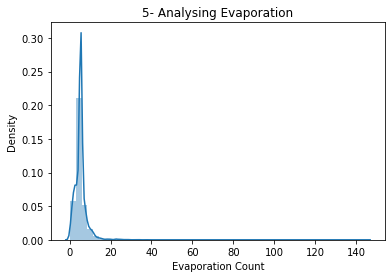

In [42]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('5- Analysing Evaporation')
sns.distplot(df['evaporation'])
plt.xlabel('Evaporation Count', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()


'''CONCLUSION -Here in the below plot we can clearly find that the Highest Numbers of Evaporation count is lying in
 between 0-20 on most of the days .
 The Maximum value of Evaporation is highest upto = more then 140 (145) '''

Analysing Sunshine

In [43]:
## Sunshine -The number of hours of bright sunshine in the day
df['sunshine'].nunique()

141

Out of 8425 there are 141 unique values are present in the column

In [44]:
print (df['sunshine'].min())
print (df['sunshine'].max())
print (df['sunshine'].mean())

0.0
13.9
7.63220491988277


The minimum Sunshine hours during a day is 0.0 hours
The Maximum Sunshine hours during a day is 13.9 hours
The mean / average Sunshine hours of a any is 7.63 hours

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


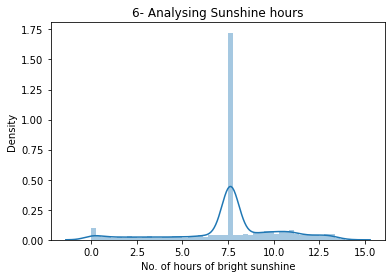

In [45]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('6- Analysing Sunshine hours')
sns.distplot(df['sunshine'])
plt.xlabel('No. of hours of bright sunshine', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

**Observation:-**
    1. here from the above plot we can find that the number of counts of Bright Sunshine Hours are
 highest in between 7 - 8 hours.

Analysing Strongest Wind Direction

In [46]:
# WindGustDir- The direction of the strongest wind gust in the 24 hours to midnight
df['windgustdir'].nunique()

16

In [47]:
df['windgustdir'].unique()
# E= East, W=West, N=North, S=South

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [48]:
df['windgustdir'].value_counts()
# Most oF the times the strongest wind direction is of N-North Winds
# then SSE- South SouthEast & S-South

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: windgustdir, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


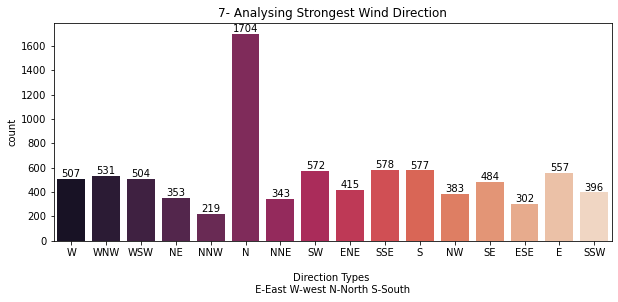

In [49]:


plt.figure(figsize = (10,4), facecolor='white')
plt.title('7- Analysing Strongest Wind Direction')
ax = sns.countplot(df['windgustdir'],palette='rocket')
ax.bar_label(ax.containers[0])
plt.xlabel('\nDirection Types \n E-East W-west N-North S-South ', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()


**Observations:-**
    1. Here in the below plot we find that Highest Number of Counts - 1704 is at N-North Direction.
 that means at most of the time during the day, the direction of wind gust is in N-NORTH DIRECTION

Analysing Speed (km/hr) of Strongest Wind

In [50]:
# WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
df['windgustspeed'].nunique()

53

out of 8425 values there are 53 unique speed values are present inside the column.

In [51]:
print(df['windgustspeed'].min(),'km/hr')
print(df['windgustspeed'].max(),'km/hr')
print(df['windgustspeed'].mean(),'km/hr')

7.0 km/hr
107.0 km/hr
40.17446865751997 km/hr


Minimum speed of Strog Wind Gust is = 7.0 km/hr during any day
 Maximum speed of Strog Wind Gust is = 107.0 km/hr during any day
 Mean / Average speed of Strog Wind Gust is = 40.17 km/hr during any day'''

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


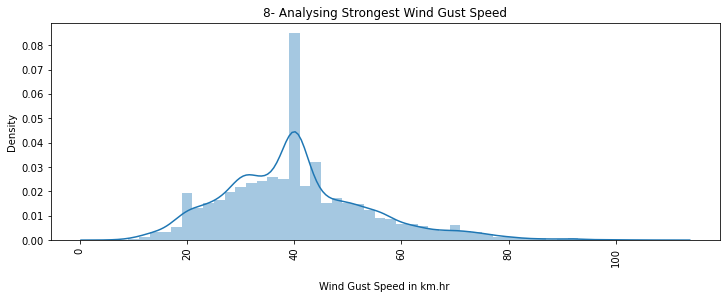

In [52]:
plt.figure(figsize = (12,4), facecolor='white')
plt.title('8- Analysing Strongest Wind Gust Speed')
sns.distplot(df['windgustspeed'])
# ax.bar_label(ax.containers[0])
plt.xlabel('\nWind Gust Speed in km.hr ', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

**Observation:-**
1. Minimum speed of Strog Wind Gust is = 7.0 km/hr during any day
2. Maximum speed of Strog Wind Gust is = 107.0 km/hr during any day
3. Maximum Density of speed of Strog Wind Gust is in b/w = 40 - 45 km/hr during any day'''

Analysing Wind Direction at 9 am & 3 pm

In [53]:
# WindDir9am -Direction of the wind at 9am
# WindDir3pm -Direction of the wind at 3pm
print(df['winddir9am'].nunique())
print(df['winddir3pm'].nunique())


16
16


In [54]:
df['winddir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [55]:
df['winddir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


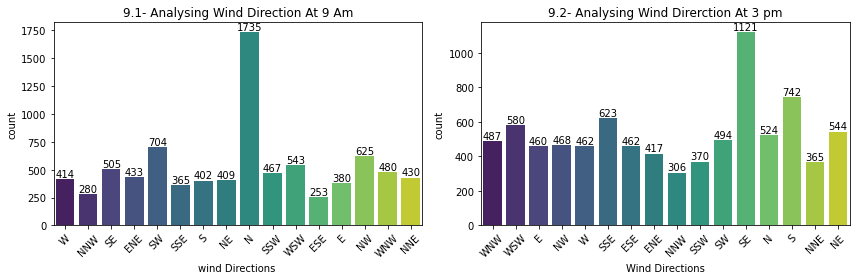

In [56]:
plt.figure(figsize = (12,4), facecolor='white')
plt.subplot (1,2,1)
plt.title('9.1- Analysing Wind Direction At 9 Am')
ax= sns.countplot(df['winddir9am'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('wind Directions ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (1,2,2)
plt.title('9.2- Analysing Wind Direrction At 3 pm')
ax= sns.countplot(df['winddir3pm'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Wind Directions', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.tight_layout()
plt.show()

**Observations:-**
     Here when we comapre both above plots then we found following thind :-
1. Overall wind directions in all directions is Littlebit higher at 3pm as comapred to 9am.
 (that means the speed of wind is higher at 3pm compared to 9am)

2. The total Number of day count of wind in "N-NORTH DIRECTION" at 9am is Highest = 1735 days
 (that means from total days , the wind is floating in N-NORTH DIRECTION on 1735 days)

3. Where as at 3pm the wind is floating in SE-SOUTH EAST DIRECTION on Highest days = 1121 days


CONCLUSION - During the period the direction of wind at 9am (morning time) is N-NORTH DIRECTION on maximum 1735 days.
 the direction of wind at 3pm (Evening time) is SE_SOUTH EAST DIRECTION on maximum 1121 days.

In [57]:
print(df['windSpeed9am'].nunique())
print(df['windSpeed3pm'].nunique())

35
36


 Analysing Speed of Wind at 9am & 3pm

In [58]:
# WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
# WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [59]:
print(df['windSpeed9am'].nunique())
print(df['windSpeed3pm'].nunique())
# there are 35 & 36 numbers of unique values are present at 9am & 3pm respectively.

35
36


In [60]:
print(df['windSpeed9am'].min(),'km/hr')
print(df['windSpeed9am'].max(),'km/hr','= The Maximum Speed Of Wind At 9am')
print(df['windSpeed9am'].mean(),'km/hr','= The Mean/average speed of wind at 9am')

0.0 km/hr
63.0 km/hr = The Maximum Speed Of Wind At 9am
13.847646424721523 km/hr = The Mean/average speed of wind at 9am


In [61]:
print(df['windSpeed3pm'].min(),'km/hr')
print(df['windSpeed3pm'].max(),'km/hr','= The Maximum Speed Of Wind At 3pm')
print(df['windSpeed3pm'].mean(),'km/hr','= The Mean/average speed of wind at 3pm')

0.0 km/hr
83.0 km/hr = The Maximum Speed Of Wind At 3pm
18.533661937965867 km/hr = The Mean/average speed of wind at 3pm


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


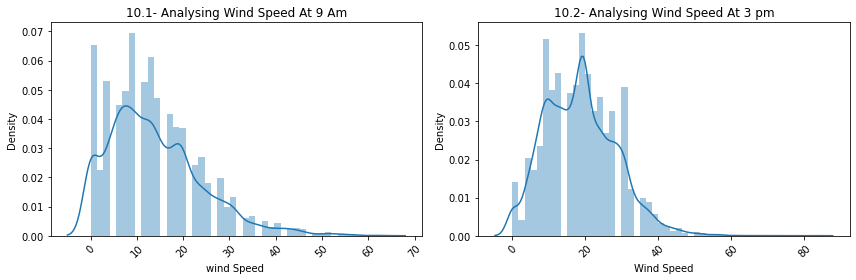

In [62]:
plt.figure(figsize = (12,4), facecolor='white')
plt.subplot (1,2,1)
plt.title('10.1- Analysing Wind Speed At 9 Am')
sns.distplot(df['windSpeed9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('wind Speed ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (1,2,2)
plt.title('10.2- Analysing Wind Speed At 3 pm')
sns.distplot(df['windSpeed3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Wind Speed', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.tight_layout()
plt.show()

 Here from the above analysis we can conclude that -
 The Maximum speed of wind is Higher at 3PM (83 km/hr) as comapred to 9AM (63km/hr)
 The Average Speed of Wind is also Higher at 3PM (18.53 km/hr) as compared to 9AM (13.84 km.hr)

 CONCLUSION :- THE SPEED OF WIND IS HIGHER AT EVENING TIME 


Analysing Both Wind Directions & Wind Speed Together

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users

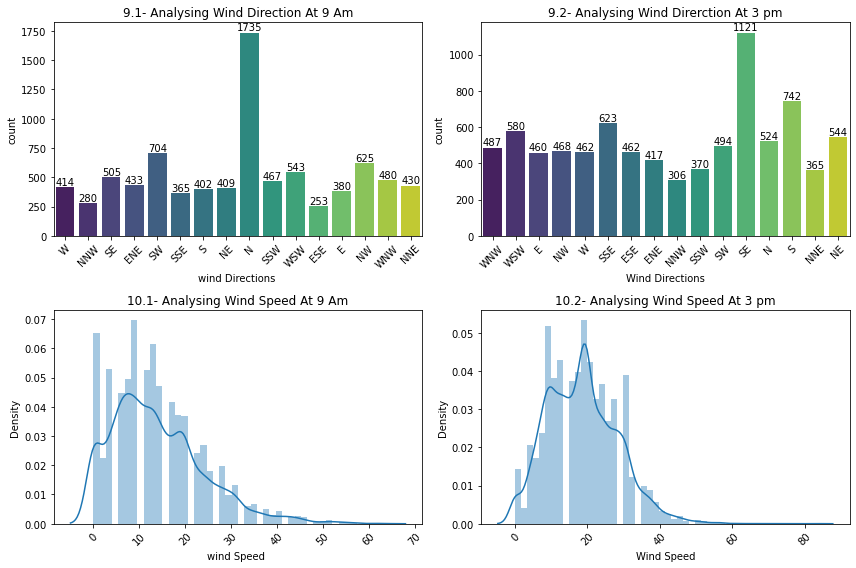

In [63]:
plt.figure(figsize = (12,8), facecolor='white')
plt.subplot (2,2,1)
plt.title('9.1- Analysing Wind Direction At 9 Am')
ax= sns.countplot(df['winddir9am'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('wind Directions ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,2)
plt.title('9.2- Analysing Wind Direrction At 3 pm')
ax= sns.countplot(df['winddir3pm'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Wind Directions', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,3)
plt.title('10.1- Analysing Wind Speed At 9 Am')
sns.distplot(df['windSpeed9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('wind Speed ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,4)
plt.title('10.2- Analysing Wind Speed At 3 pm')
sns.distplot(df['windSpeed3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Wind Speed', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.tight_layout()
plt.show()

CONCLUSION-1 - During the period the direction of wind at 9am (morning time) is in N-NORTH DIRECTION on maximum 1735 days.
(for 9.1 & 9.2) the direction of wind at 3pm (Evening time) is in SE_SOUTH EAST DIRECTION on maximum 1121 days.
 * Overall wind directions in all directions is Littlebit higher at 3pm as comapred to 9am.
 * (that means the speed of wind is higher at 3pm compared to 9am)
CONCLUSION-2 :- THE SPEED OF WIND IS HIGHER AT EVENING TIME (3pm)
(for 10.1 & 10.2)

Analysing Humidity at 9am & 3pm

In [64]:
# Humidity9am -Humidity (percent) at 9am
# Humidity3pm -Humidity (percent) at 3pm
print(df['humidity9am'].nunique())
print(df['humidity3pm'].nunique())


91
95


There are 91 & 95 unique values are present in Humidity at 9am & 3pm columns

In [65]:
print(df['humidity9am'].min(),'%','=> Minimum Humidity at any day at 9am')
print(df['humidity9am'].max(),'%','=> Maximum Humidity at any day at 9am')
print(round(df['humidity9am'].mean()),'%','=> Mean/average Humidity at 9 am')

10.0 % => Minimum Humidity at any day at 9am
100.0 % => Maximum Humidity at any day at 9am
68 % => Mean/average Humidity at 9 am


In [66]:
print(df['humidity3pm'].min(),'%','=> Minimum Humidity at any day at 3pm')
print(df['humidity3pm'].max(),'%','=> Maximum Humidity at any day at 3pm')
print(round(df['humidity3pm'].mean()),'%','=> Mean/average Humidity at 3pm')

6.0 % => Minimum Humidity at any day at 3pm
99.0 % => Maximum Humidity at any day at 3pm
51 % => Mean/average Humidity at 3pm


Here above we can find that the MINIMUM & AVERAGE HUMIDITY OF 9AM HIGHER THEN 3PM\nMaximum humidity at both timestamps are a
lmost same.


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


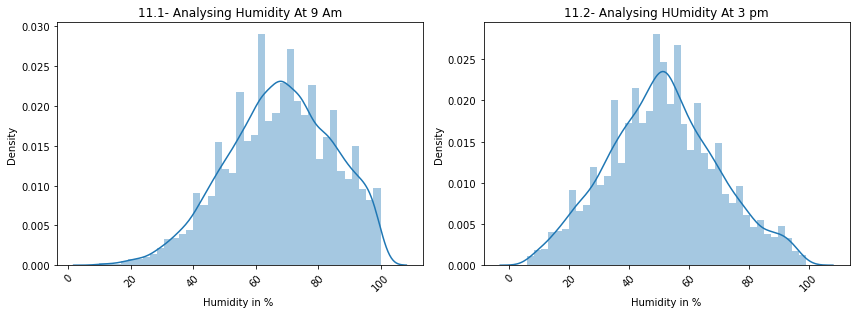

In [67]:
plt.figure(figsize = (12,8), facecolor='white')
plt.subplot (2,2,1)
plt.title('11.1- Analysing Humidity At 9 Am')
sns.distplot(df['humidity9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Humidity in % ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,2)
plt.title('11.2- Analysing HUmidity At 3 pm')
sns.distplot(df['humidity3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Humidity in %', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.tight_layout()
plt.show()

Here we can clealry see the difference between the both curves.\n 3pm curve is almost bell-shaped, whereas at 9am we can f
ind a little bit 'left-skewed curve' & data above 60% is also..\n ... a little bit higher as compared to 3pm curve.\n \n
CONCLUSION - THE HUMIDITY AT 9AM (avg- 69%) IS HIGHER THEN 3PM (avg-58 %)

Anallysing Pressure at 9am & 3pm

In [68]:
# Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
# Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

print(df['pressure9am'].nunique())
print(df['pressure3pm'].nunique())

385
375


There are 385 & 375 unique values are present in Pressure at 9am & 3pm columns.

In [69]:
print(round(df['pressure9am'].min()),'hpa','=> Minimum Atmospheric pressure (hpa) reduced to mean sea level at 9am')
print(round(df['pressure9am'].max()),'hpa','=> Maximum Atmospheric pressure (hpa) reduced to mean sea level at 9am')
print(round(df['pressure9am'].mean()),'hpa','=> Average/Mean Atmospheric pressure (hpa) reduced to mean sea level at 9am')

990 hpa => Minimum Atmospheric pressure (hpa) reduced to mean sea level at 9am
1039 hpa => Maximum Atmospheric pressure (hpa) reduced to mean sea level at 9am
1018 hpa => Average/Mean Atmospheric pressure (hpa) reduced to mean sea level at 9am


In [70]:
print(round(df['pressure3pm'].min()),'hpa','=> Minimum Atmospheric pressure (hpa) reduced to mean sea level at 3pm')
print(round(df['pressure3pm'].max()),'hpa','=> Maximum Atmospheric pressure (hpa) reduced to mean sea level at 3pm')
print(round(df['pressure3pm'].mean()),'hpa','=> Average/Mean Atmospheric pressure (hpa) reduced to mean sea level at 3pm')

983 hpa => Minimum Atmospheric pressure (hpa) reduced to mean sea level at 3pm
1036 hpa => Maximum Atmospheric pressure (hpa) reduced to mean sea level at 3pm
1015 hpa => Average/Mean Atmospheric pressure (hpa) reduced to mean sea level at 3pm


Here from the above analysis we can find that the Minimum, Maximum & Average/Mean Values of Atmospheric Pressure at 9am\n
is Higher then the Atmospheric Pressure at 3pm


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


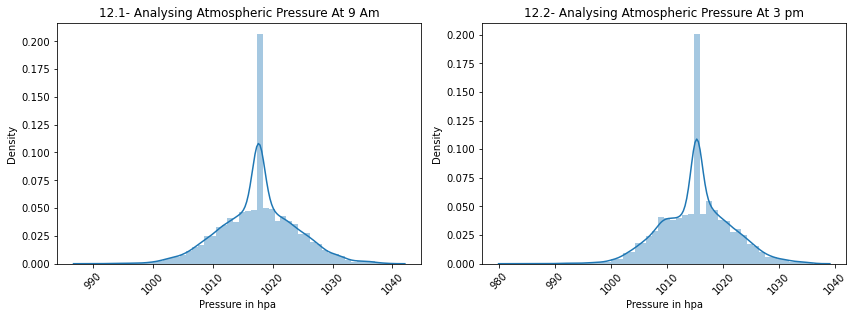

In [71]:
plt.figure(figsize = (12,8), facecolor='white')
plt.subplot (2,2,1)
plt.title('12.1- Analysing Atmospheric Pressure At 9 Am')
sns.distplot(df['pressure9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Pressure in hpa ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,2)
plt.title('12.2- Analysing Atmospheric Pressure At 3 pm')
sns.distplot(df['pressure3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Pressure in hpa', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.tight_layout()
plt.show()


 THE AMOSPHERIC PRESSURE AT 9AM & 3PM IS ALMOST SIMILAR'

Analysing Cloud & Temperature at 9am & 3pm 

In [72]:
# Cloud9am - Fraction of sky obscured by cloud at 9am.
# Cloud3pm -Fraction of sky obscured by cloud
# Temp9am-Temperature (degrees C) at 9am
# Temp3pm -Temperature (degrees C) at 3pm
# Fraction of sky obscured by cloud at 9am & 3pm

In [73]:

#Number of unique values present inside the column are as :
print(df['cloud3pm'].nunique())
print(df['temp9am'].nunique())
print(df['temp3pm'].nunique())


10
305
329


In [74]:
print(df['cloud9am'].min(),'=> Fraction of sky obscured by cloud at 9am')
print(df['cloud9am'].max(),'=> Fraction of sky obscured by cloud at 9am')
print(round(df['cloud9am'].mean()),'=> Fraction of sky obscured by cloud at 9am')

0.0 => Fraction of sky obscured by cloud at 9am
8.0 => Fraction of sky obscured by cloud at 9am
5 => Fraction of sky obscured by cloud at 9am


In [75]:
print(df['cloud3pm'].min(),'=> Fraction of sky obscured by cloud at 3pm')
print(df['cloud3pm'].max(),'=> Fraction of sky obscured by cloud at 3pm')
print(round(df['cloud3pm'].mean()),'=> Fraction of sky obscured by cloud at 3pm')

0.0 => Fraction of sky obscured by cloud at 3pm
8.0 => Fraction of sky obscured by cloud at 3pm
5 => Fraction of sky obscured by cloud at 3pm


Clouds Obscured at 9am & 3pm is almost similar

In [76]:
# Analysing Minimum, Maximum & Average Temperature at 9am & 3pm.

In [77]:
print(df['temp9am'].min(),'°C','=> Minimum Temperature at 9am')
print(df['temp9am'].max(),'°C','=> Maximum Temperature at 9am')
print(round(df['temp9am'].mean()),'°C','=> Mean / Average Temperature at 9am')

1.9 °C => Minimum Temperature at 9am
39.4 °C => Maximum Temperature at 9am
18 °C => Mean / Average Temperature at 9am


In [78]:
print(df['temp3pm'].min(),'°C','=> Minimum Temperature at 3pm')
print(df['temp3pm'].max(),'°C','=> Maximum Temperature at 3pm')
print(round(df['temp3pm'].mean()),'°C','=> Mean / Average Temperature at 3pm')

7.3 °C => Minimum Temperature at 3pm
44.1 °C => Maximum Temperature at 3pm
22 °C => Mean / Average Temperature at 3pm


The Minimum , Maximum & Mean/Average Temperature Values are Higher at 3Pm as compared to 9am

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

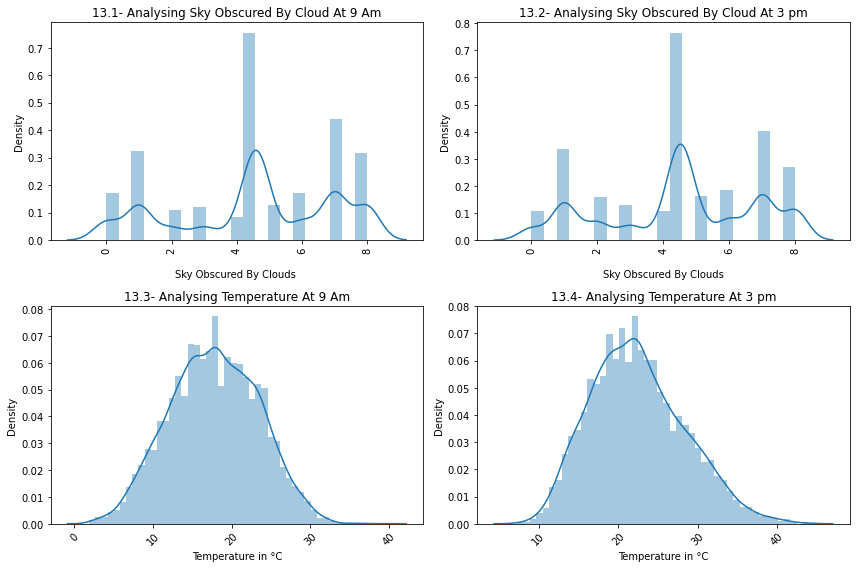

In [79]:
plt.figure(figsize = (12,8), facecolor='white')
plt.subplot (2,2,1)
plt.title('13.1- Analysing Sky Obscured By Cloud At 9 Am')
sns.distplot(df['cloud9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('\nSky Obscured By Clouds ', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,2)
plt.title('13.2- Analysing Sky Obscured By Cloud At 3 pm')
sns.distplot(df['cloud3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('\nSky Obscured By Clouds', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,3)
plt.title('13.3- Analysing Temperature At 9 Am')
sns.distplot(df['temp9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Temperature in °C', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,4)
plt.title('13.4- Analysing Temperature At 3 pm')
sns.distplot(df['temp3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Temperature in °C', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.tight_layout()
plt.show()

 0.0 => Minimum Fraction of sky obscured by cloud at 9am & 3pm\n 8.0 => Maximum Fraction of sky obscured by cloud at 9am
& 3pm\n 
5.0 => Mean/ Average Fraction of sky obscured by cloud at 9am & 3pm\n CONCLUSION-1 (for 13.1 & 13.2) 
- Clouds Obscured at 9am & 3pm is almost similar\n \n \n * 1.9 °C => Minimum Temperature at 9am.
7.3 °C => Minimum Temperature at 3pm\n * 39.4 °C => Maximum Temperature at 9am .
44.1 °C => Maxim
um Temperature at 3pm. 
18 °C => Mean / Average Temperature at 9am * 22 °C => Mean / Average Tempera
ture at 3pm
we can also see the temperature curve is
slightly Right Skewed at 3pm\n

CONCLUSION-2 - The Minimum , Maximum & Mean/Average Temperature Values are Higher at 3Pm as compared to 9am\n (for 1
3.3 & 13.4)

Analysing Rain Today & Rain Tomorrow

In [80]:
print(df['raintoday'].unique())
print(df['raintoday'].nunique())
print(df['raintomorrow'].unique())
print(df['raintomorrow'].nunique())

['No' 'Yes']
2
['No' 'Yes']
2


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


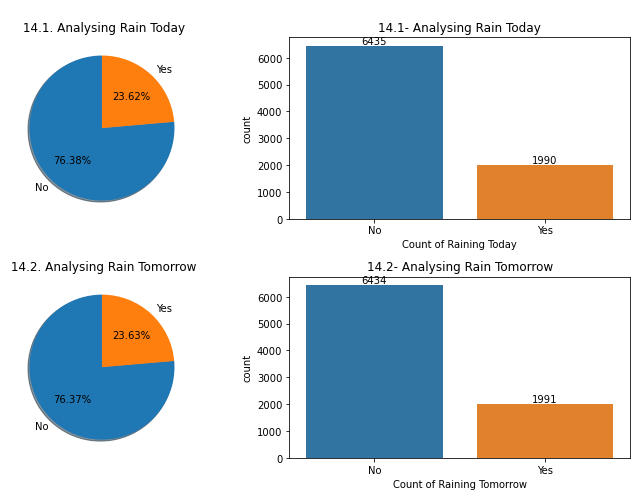

In [81]:
plt.figure(figsize = (10,7), facecolor='white')
plt.subplot (2,2,1)
# plt.figure(figsize=(3,3))
plt.title('\n 14.1. Analysing Rain Today')
def my_autopct(pct):
 return f'{pct:.2f}%'
plt.pie(df['raintoday'].value_counts(),startangle=90,autopct=my_autopct,labels=['No', 'Yes'],shadow= True)
plt.subplot (2,2,2)
plt.title('14.1- Analysing Rain Today')
ax = sns.countplot(df['raintoday'])
ax.bar_label(ax.containers[0])
plt.xlabel('Count of Raining Today', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.subplot (2,2,3)
# plt.figure(figsize=(3,3))
plt.title('\n 14.2. Analysing Rain Tomorrow')
def my_autopct(pct):
 return f'{pct:.2f}%'
plt.pie(df['raintomorrow'].value_counts(),startangle=90,autopct=my_autopct,labels=['No', 'Yes'],shadow= True)
plt.subplot (2,2,4)
plt.title('14.2- Analysing Rain Tomorrow')
ax = sns.countplot(df['raintomorrow'])
ax.bar_label(ax.containers[0])
plt.xlabel('Count of Raining Tomorrow', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.tight_layout()
plt.show()


 THE VALUES OF RAIN TODAY & RAIN TOMORROW ARE ALMOST SIMILAR IN THE COLUMNS'

Applying Bivariate Or MultiVariate Analysis

Here we know that we are given with two situations where in :
1. First Situation :- Where we have to predict "Rain Tomorrrow"
(Yes/No)\
2. Second Situtation :- Where we have to predict "Rainfall" (Quantity of Rainfall, if Yes)
3. So According to situations we need to analyse multiple columns saymalteneously with our both TARGET COLUMNS (1) \'Rain Tomorrow Rainfall Analysing Both Conditions in Following Steps :-

1) Analysing Conditions for "Rain Tomorrow" 
(a) Analysing Rain Tomorrow with Minimum and Maximum temperature :-

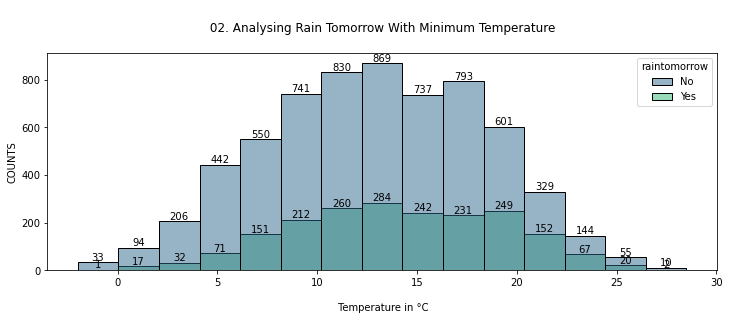

In [82]:
plt.figure (figsize = (12,4), facecolor = "white")
# plt.subplot(2,1,1)
plt.title('\n 02. Analysing Rain Tomorrow With Minimum Temperature \n')
ax=sns.histplot(data=df, x="mintemp", hue="raintomorrow",palette='viridis',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)

# TO IDENTIFY PERCENTAGE ALSO
# total_counts = len(df) # Total number of data points
# for r in ax.patches:
# height = r.get_height()
# percentage = (height / total_counts) * 100 # Calculate the percentage
# ax.annotate(f'{percentage:.2f}%',
# (r.get_x() + r.get_width() / 2., height),
# ha='center', va='bottom', rotation=0, fontsize=10)
# va='top', 'bottom', 'center', 'baseline', 'center_baselin

plt.xlabel('\n Temperature in °C', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

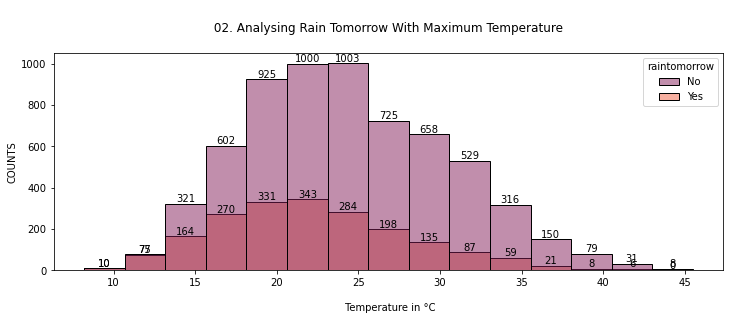

In [83]:
plt.figure (figsize = (12,4), facecolor = "white")
# plt.subplot(2,1,1)
plt.title('\n 02. Analysing Rain Tomorrow With Maximum Temperature \n')
ax=sns.histplot(data=df, x="maxtemp", hue="raintomorrow",palette='rocket',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left
# TO IDENTIFY PERCENTAGE ALSO
# total_counts = len(df) # Total number of data points
# for r in ax.patches:
# height = r.get_height()
# percentage = (height / total_counts) * 100 # Calculate the percentage
# ax.annotate(f'{percentage:.2f}%',
# (r.get_x() + r.get_width() / 2., height),
# ha='center', va='bottom', rotation=0, fontsize=10)
# va='top', 'bottom', 'center', 'baseline', 'center_baselin

plt.xlabel('\n Temperature in °C', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

 1. THE PROBABILITY OF RAINTOMORROW-YES IS HIGHER IN THE MIN-TEMP RANGE OF 18°C-24°C\n
ANALYSIS (2)THE PROBABILITY OF RAINTOMORROW-YES IS HIGHER IN THE MAXIMUM-TEMP RANGE OF 10°C-18°C\n
\n [ THAT MEANS WE CAN SAY THAT THE % PROBABILITY OF RAIN-TOMORROW (YES) IS HIGHER IN THE TEMPERATURE RANGE OF 10°C-24°C ]

 Analysing Rain Tomorrow with Direction Of Wind & Speed at 9 AM

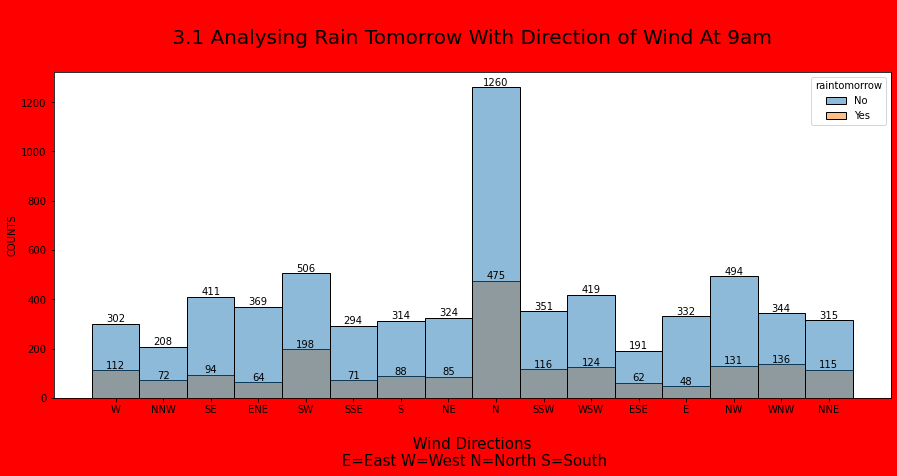

In [84]:
# wind direction at 9am = what is the direction of wind at 9am
# wind speed at 9am = Wind speed (km/hr) averaged over 10 minutes prior to 9am
plt.figure (figsize = (15,6), facecolor = "red")
plt.title('\n 3.1 Analysing Rain Tomorrow With Direction of Wind At 9am \n', fontsize=20)
ax=sns.histplot(data=df, x="winddir9am", hue="raintomorrow")
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('\n Wind Directions \n E=East W=West N=North S=South', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

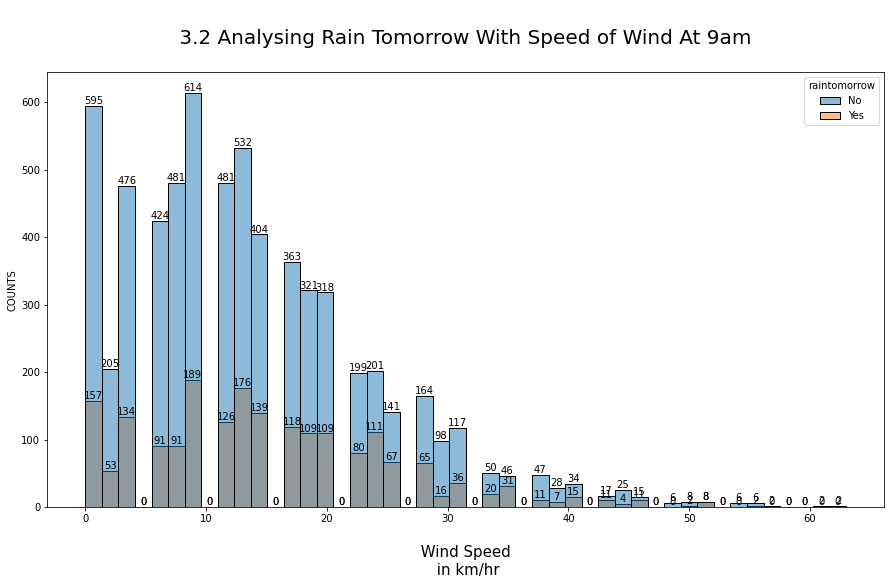

In [85]:
plt.figure (figsize = (15,8), facecolor = "white")
plt.title('\n 3.2 Analysing Rain Tomorrow With Speed of Wind At 9am \n', fontsize=20)
ax=sns.histplot(data=df, x="windSpeed9am", hue="raintomorrow")
# ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('\n Wind Speed \n in km/hr', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

[ CONCLUSION - THE % PROBABILITY OF "RAINT-OMORROW(YES)" IS HIGHEST WITH
 THE 20 - 40 KM/HR WINDSPEED AT 9AM | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION WNW, SW & N ]

Analysing RainTomorrow with Wind Direction & speed at 3 PM

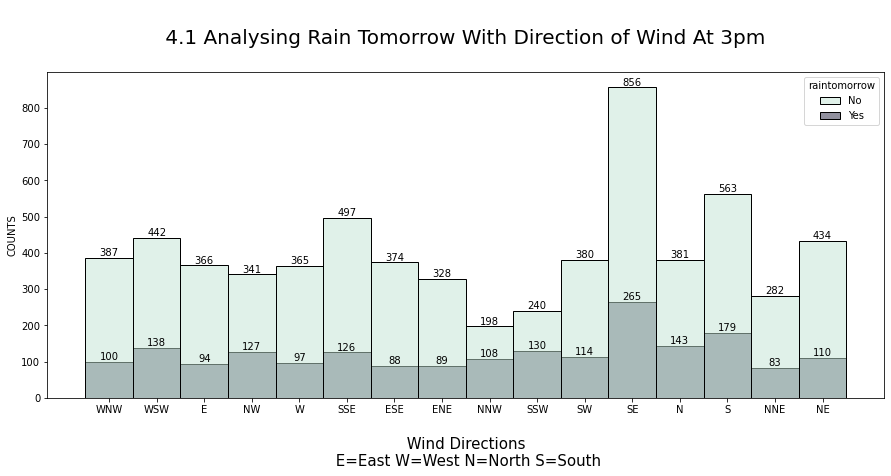

In [86]:
plt.figure (figsize = (15,6), facecolor = "white")
plt.title('\n 4.1 Analysing Rain Tomorrow With Direction of Wind At 3pm \n', fontsize=20)
ax=sns.histplot(data=df, x="winddir3pm", hue="raintomorrow",palette = 'ch:start=.2,rot=-.4')
# palette = 'viridis' 'rocket' 'deep' 'dark=blue' 'ch:start=.2,rot=-.4'
# ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('\n Wind Directions \n E=East W=West N=North S=South', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

[CONCLUSION - SO HERE WE CAN CONCLUDE THAT THE % PROBABILITY OF "RAIN-TOMORROW"(YES) IS ]
 [ HIGHER WITH THE DIRECTION NNW,SSW & N AT (3PM)]

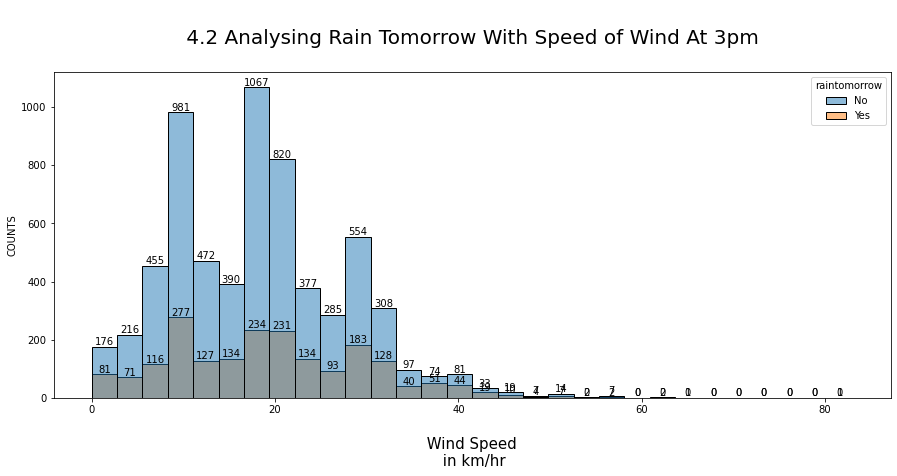

In [87]:
plt.figure (figsize = (15,6), facecolor = "white")
plt.title('\n 4.2 Analysing Rain Tomorrow With Speed of Wind At 3pm \n', fontsize=20)
ax=sns.histplot(data=df, x="windSpeed3pm", hue="raintomorrow",bins=30)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('\n Wind Speed \n in km/hr', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

[ CONCLUSION - THE % PROBABILITY OF "RAINT-OMORROW(YES)" IS HIGHEST [33.87%] WITH
 THE 40-60 KM/HR WINDSPEED AT 3PM | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION NNW,SSW & N AT (3PM) ]

[OVERALL CONCLUSION (9AM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHEST [29.00 %] WITH THE 20-40 KM/HR WINDSPEED AT 9AM
 | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION WNW (WestNorthWest), SW (SouthWest) & N (North) direction AT 9AM ]
[OVERALL CONCLUSION (3PM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHEST [33.87 %] WITH THE 40-60 KM/HR WINDSPEED AT 3PM
| TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION NNW (NorthNorthWest), SSW (SouthSouthWest) & N (North) direction AT 3PM ]

Analysing Raintomorrow (Yes) with Humidity at 9am & 3 pm

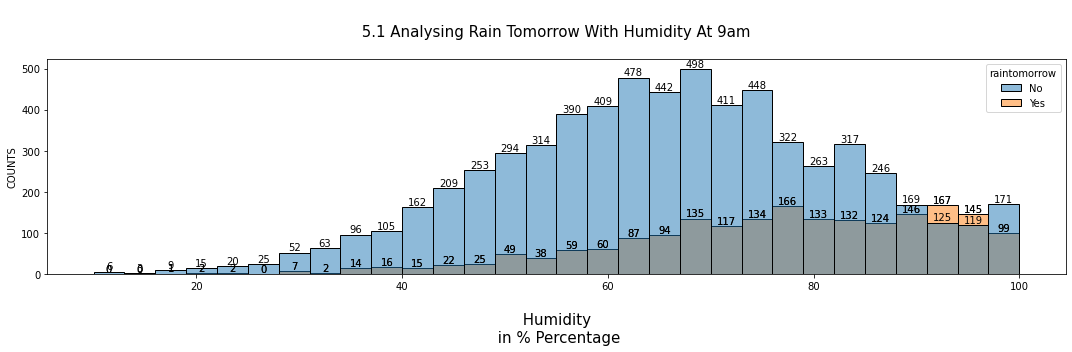

In [88]:
plt.figure (figsize = (15,5), facecolor = "white")
plt.title('\n 5.1 Analysing Rain Tomorrow With Humidity At 9am \n', fontsize=15)
ax=sns.histplot(data=df, x="humidity9am", hue="raintomorrow",bins=30)
ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('\n Humidity \n in % Percentage', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.tight_layout()
plt.show()

Here above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as % of humidity Increases
The Highest (41 %) Probability for "RainToorrow (yes)" is in b/w 80-100% of Humidity = MAXIMUM CHANCES OF RAINING TOMORROW
The Lowest (10.26 %) Probability for "RainTomorrow (yes)" is in b/w 20-40 % of Humidity = LOWEST CHANCES OF RAINING TOMORROW

 [CONCLUSION-5.1 :- HIGHER THE PERCENTAGE OF HUMIDITY AT 9 AM == HIGHER THE CHANCES OF RAINING]

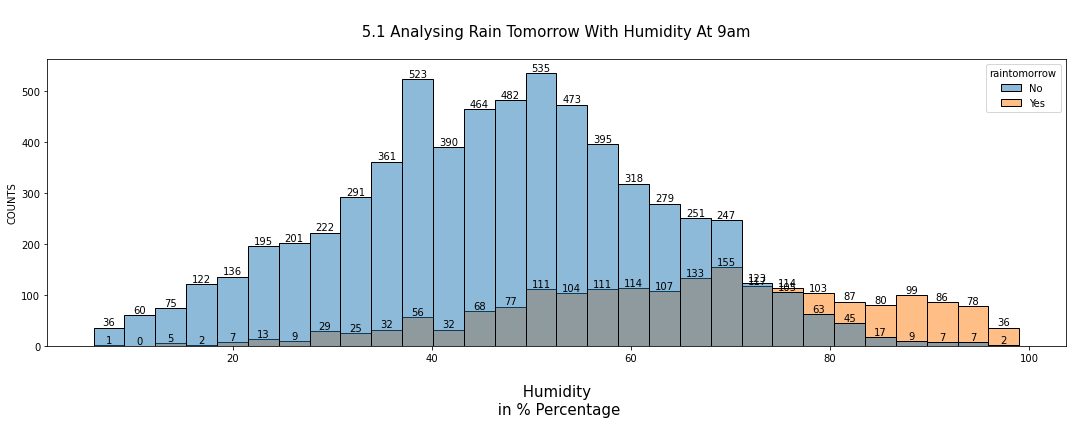

In [89]:
plt.figure (figsize = (15,6), facecolor = "white")
plt.title('\n 5.1 Analysing Rain Tomorrow With Humidity At 9am \n', fontsize=15)
ax=sns.histplot(data=df, x="humidity3pm", hue="raintomorrow",bins=30)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('\n Humidity \n in % Percentage', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
plt.tight_layout()
plt.show()

Here above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as % of humidity Increases
The Highest (84.26 %) Probability for "RainToorrow (yes)" is in b/w 80-100% of Humidity 3pm= MAXIMUM CHANCES OF RAINING TOMORROW
The Lowest (3.37 %) Probability for "RainTomorrow (yes)" is in b/w 20-40 % of Humidity 3pm= LOWEST CHANCES OF RAINING TOMORROW

 [CONCLUSION-5.2 :- HIGHER THE PERCENTAGE OF HUMIDITY == HIGHER THE CHANCES OF RAINING]
 (If Humidity % is in b/w 80-100% at 3pm == Maximum chances of Raining Tomorrow)

[CONCLUSION-5.1 :- HIGHER THE PERCENTAGE OF HUMIDITY AT 9 AM == HIGHER THE CHANCES OF RAINING]
[CONCLUSION-5.2 :- HIGHER THE PERCENTAGE OF HUMIDITY AT 3 PM == HIGHER THE CHANCES OF RAINING]
 (If Humidity % is in b/w 80-100% at 3pm == Maximum chances of Raining Tomorrow)


Analysing RainTomorrow with Pressure at 9am & 3pm

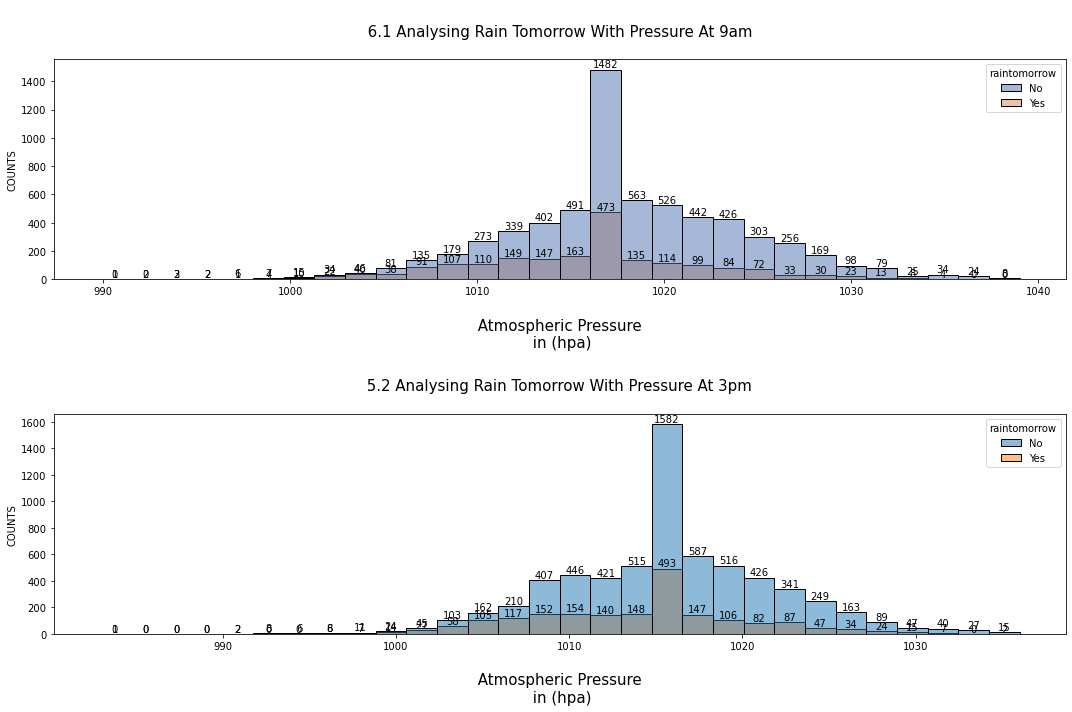

In [90]:
 plt.figure (figsize = (15,10), facecolor = "white")
plt.subplot(2,1,1)
plt.title('\n 6.1 Analysing Rain Tomorrow With Pressure At 9am \n', fontsize=15)
ax=sns.histplot(data=df, x="pressure9am", hue="raintomorrow",bins=30,palette='deep')
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('\n Atmospheric Pressure \n in (hpa)', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.subplot(2,1,2)
plt.title('\n 5.2 Analysing Rain Tomorrow With Pressure At 3pm \n', fontsize=15)
ax=sns.histplot(data=df, x="pressure3pm", hue="raintomorrow",bins=30)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('\n Atmospheric Pressure \n in (hpa)', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.tight_layout()
plt.show()

Here above we analysing ATMOSPHERIC PRESSURE at 9AM & 3PM
we are trying to find the Highest probability of "RainTomorrow (yes)" at what atmospheric pressure :-
CONCLUSION -
 THE HIGHEST (24%) PROBABILITY OF RAINING TOMORROW (YES) IS WHEN, THE ATMOSPHERIC PRESSURE AT 9 AM IS = 1010-1020 hpa
 similarly at 3pm also- THE PROBABILITY OF RAINING TOMORROW (YES) HIGHEST (22.60% )WHEN ATMOSPHERIC PRESSURE AT 3PM IS
 LYING IN BETWEEN = 1010-1020 hpa


Analysing RainTomorrow With Clouds at 9am & 3pm 

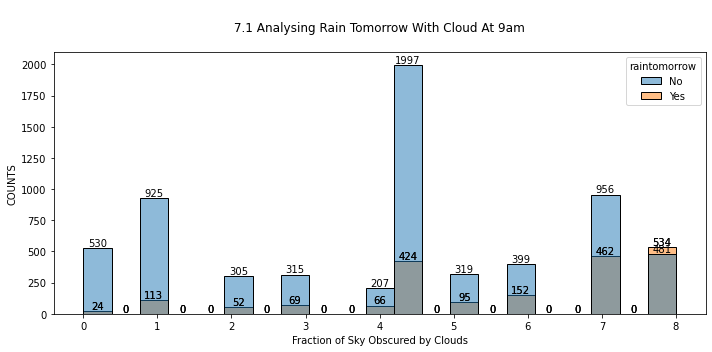

In [91]:
plt.figure (figsize = (10,5), facecolor = "white")
plt.title('\n 7.1 Analysing Rain Tomorrow With Cloud At 9am \n', fontsize=12)
ax=sns.histplot(data=df, x="cloud9am", hue="raintomorrow")
ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('Fraction of Sky Obscured by Clouds', fontsize=10)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
plt.tight_layout()
plt.show()

Here above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as 'Fractions Increases'
* The Highest (52.61 %) Probability for "RainToorrow (yes)"
is at 8th Fraction of sky Obscured by cloud at 9 AM = MAXIMUM CHANCES OF RAINING TOMORROW
The Lowest (4.33 %) Probability for "RainTomorrow (yes)"
is at 8th Fraction of sky Obscured by cloud at 9 AM= LOWEST CHANCES OF RAINING TOMORROW

 [CONCLUSION-7.1 :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]
 (Here at 9 AM at Fraction-8th the Highest Probability is Lower as compared to 3 PM )

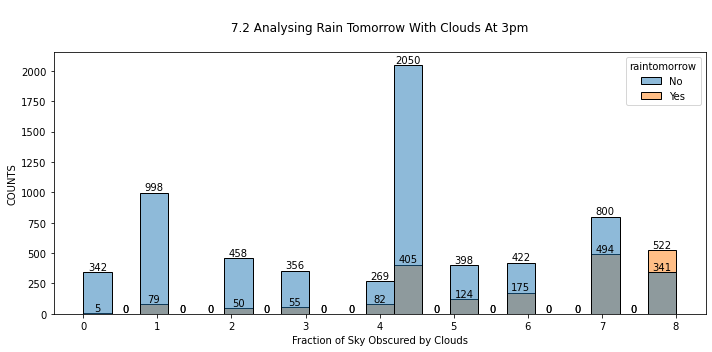

In [92]:
plt.figure (figsize = (10,5), facecolor = "white")
plt.title('\n 7.2 Analysing Rain Tomorrow With Clouds At 3pm \n', fontsize=12)
ax=sns.histplot(data=df, x="cloud3pm", hue="raintomorrow")
# ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('Fraction of Sky Obscured by Clouds', fontsize=10)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.tight_layout()
plt.show()

Here above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as 'Fractions Increases'
* The Highest (60.48 %) Probability for "RainToorrow (yes)"
is at 8th Fraction of sky Obscured by cloud at 3 PM = MAXIMUM CHANCES OF RAINING TOMORROW
The Lowest (1.44 %) Probability for "RainTomorrow (yes)"
is at 8th Fraction of sky Obscured by cloud at 3 PM= LOWEST CHANCES OF RAINING TOMORROW

 [CONCLUSION-7.2 :- INCREASE IN NO. OF FRACTIONS Of SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]

OVERALL CONCLUSION OF FRACTION OF SKY OBSCURED BY CLOUDS AT 9AM & 3PM\n\n[CONCLUSION-7.1 :- INCREASE
IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]\n (Here at 9 AM
at Fraction-8th the Highest Probability (52.61 %) is Lower as compared to 3 PM )\n\n[CONCLUSION-7.2 :- INCREASE IN NO. OF FRACT
IONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]\n (At 3 PM at 8th-Fraction, th
e Highest Probability (60.48 %) is Higher as compared to 9 AM )

Analysing RainTomorrow with RainToday

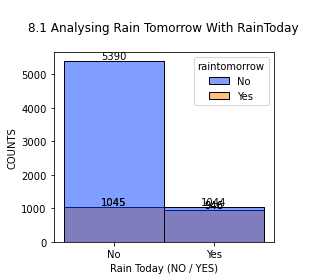

In [93]:
plt.figure (figsize = (4,4), facecolor = "white")
plt.title('\n 8.1 Analysing Rain Tomorrow With RainToday \n', fontsize=12)
ax=sns.histplot(data=df, x="raintoday", hue="raintomorrow",palette='bright')
ax.bar_label(ax.containers[0])
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height}',
 (p.get_x() + p.get_width() / 2., height),
 ha='center', va='bottom',rotation=0, fontsize=10)
# ha = 'center' 'right' 'left

plt.xlabel('Rain Today (NO / YES)', fontsize=10)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.tight_layout()
plt.show()


[CONCLUSIN-8.1 :- IF THERE IS RAINING TODAY (YES) == HIGHER THE % OF PROBABILITY (47.53 %) FOR RAINING TOMORROW (YES) ]

UPTO HERE BIVARIATE AND MULTIVARIATE ANALYSIS IS COMPLETED

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8425 non-null   object 
 1   location       8425 non-null   object 
 2   mintemp        8425 non-null   float64
 3   maxtemp        8425 non-null   float64
 4   rainfall       8425 non-null   float64
 5   evaporation    8425 non-null   float64
 6   sunshine       8425 non-null   float64
 7   windgustdir    8425 non-null   object 
 8   windgustspeed  8425 non-null   float64
 9   winddir9am     8425 non-null   object 
 10  winddir3pm     8425 non-null   object 
 11  windSpeed9am   8425 non-null   float64
 12  windSpeed3pm   8425 non-null   float64
 13  humidity9am    8425 non-null   float64
 14  humidity3pm    8425 non-null   float64
 15  pressure9am    8425 non-null   float64
 16  pressure3pm    8425 non-null   float64
 17  cloud9am       8425 non-null   float64
 18  cloud3pm

here above we can see that out of all 35 columns, there are 6 columns are of 'object' & 1 column is 'datetime' datatype.
And we need encode them for further analysis.

In [95]:
object_column = []

In [96]:
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        object_column.append(i)


In [97]:
print(object_column)
# there are 6 'object/string' columns, which need to be encoded.

['date', 'location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']


NOW APPLYING LABEL ENCODER ON ALL OBJECT COLUMNS

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le = LabelEncoder()

In [100]:
for i in object_column:
    df[i] = le.fit_transform(df[i])

'upto Here above all object columns are ENCODED SUCCESSFULLY

In [101]:
df["date"]=le.fit_transform(df["date"])
# here we can encoded date columns also..beause in pridiction of 'Raintomorrow' data column will also plays an important role.

In [102]:
df.head(5)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [103]:
print(df.dtypes)

date               int64
location           int32
mintemp          float64
maxtemp          float64
rainfall         float64
evaporation      float64
sunshine         float64
windgustdir        int32
windgustspeed    float64
winddir9am         int32
winddir3pm         int32
windSpeed9am     float64
windSpeed3pm     float64
humidity9am      float64
humidity3pm      float64
pressure9am      float64
pressure3pm      float64
cloud9am         float64
cloud3pm         float64
temp9am          float64
temp3pm          float64
raintoday          int32
raintomorrow       int32
dtype: object


Here we can see below now there is not any column is in object or string formate.
and date column is also encoded into intiger fomrate.

FINDING CORRELATION IN DATASET

In [104]:
cor = df.corr()
cor

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
date,1.000000,0.475037,0.016931,0.102409,0.004945,0.153853,0.065101,-0.084552,-0.037361,-0.012369,...,0.086328,-0.038345,0.030809,0.013545,0.005237,-0.010572,0.070703,0.113734,-0.011365,-0.011228
location,0.475037,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,...,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824
mintemp,0.016931,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,...,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942
maxtemp,0.102409,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,...,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886
rainfall,0.004945,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,...,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021
evaporation,0.153853,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,...,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012
sunshine,0.065101,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,...,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731
windgustdir,-0.084552,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,...,0.036467,0.053567,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832
windgustspeed,-0.037361,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,...,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127
winddir9am,-0.012369,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,...,0.025604,0.124556,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860


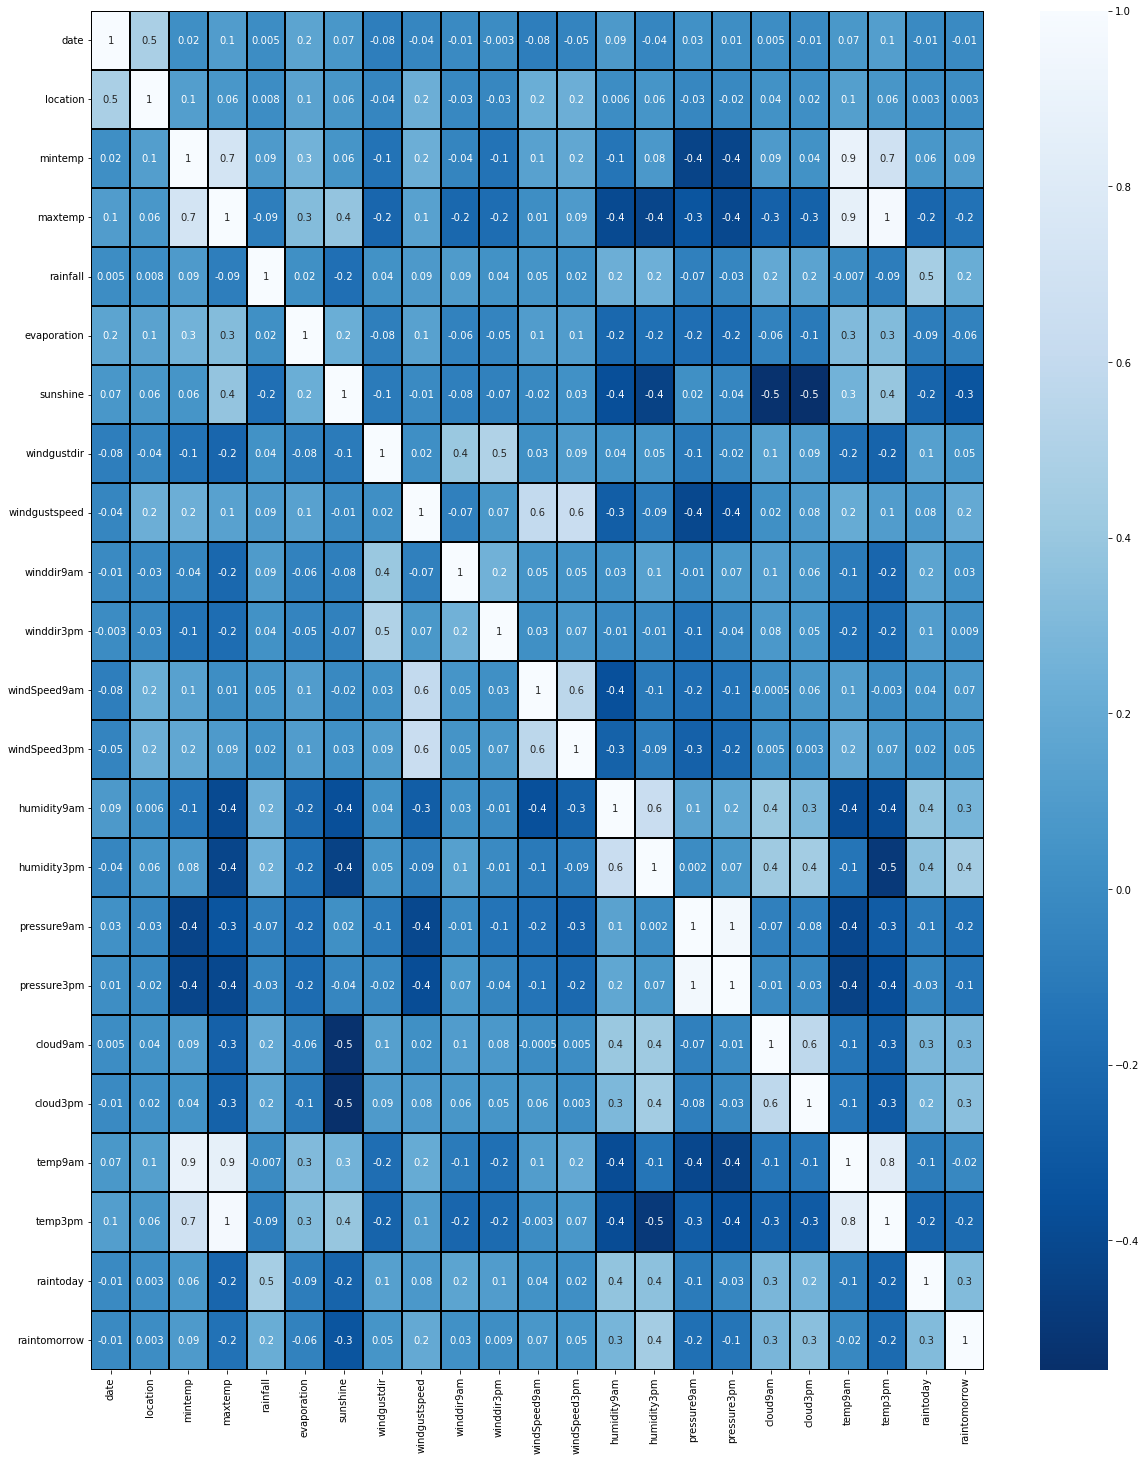

In [105]:
plt.figure (figsize = (20,25), facecolor = "white")
sns.heatmap(df.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.xticks(rotation=90);
plt.yticks(rotation=0);
plt.show()

1. If the Correlation Value is +1 (Highly Correlated) & If it is -1 (Negativelty Correlated)
2. we need to analyse the values of each column and calculate their Negatively / Positively Correlation with all other columns.
3. Here in the above Correlation - Heatmap we can find the correlation of columns with eachother & also with Target column
which is explained as follows :-

* Correlation of columns with each other :
 1. Minimum Temperature & Maximum Temperature is Highly Correlated with each other with = [.7]
 2. Minimum Temperature & Maximum Temperature is also Highly Correlated with Temp9am & Temp3pm with = [.9]
 3. WindSpeed9am & Windspeed3pm & WindgustDir are also correlated with each other with = [.6]
 4. Humidity9am & Humidity3pm are also Highly correlate with =[.6]
 5. Cloud9am & Cloud3pm are Highly Correlated with =[.6]
 6. Pressureat9am & pressureat3pm are Most Higly Correlated Columns with =[.1]

These Highly Correlated Columns can Affect our Model also so further after more analysis we will decide to remove or not.

 HIGHEST CORRELATED COLUMN WITH THE TARGET COLUMN-1 IS ['humidity3pm'] with = [.44] values.
 (which is not consider as a HIGHLY CORRELATION)

In [106]:
print(cor['rainfall'].sort_values(ascending=False))

rainfall         1.000000
raintoday        0.461106
humidity3pm      0.235444
humidity9am      0.228800
raintomorrow     0.220021
cloud9am         0.185444
cloud3pm         0.150760
winddir9am       0.093821
mintemp          0.087684
windgustspeed    0.086000
windSpeed9am     0.050631
windgustdir      0.038812
winddir3pm       0.038560
windSpeed3pm     0.024791
evaporation      0.023517
location         0.007693
date             0.004945
temp9am         -0.007083
pressure3pm     -0.033649
pressure9am     -0.072668
maxtemp         -0.087451
temp3pm         -0.090687
sunshine        -0.169432
Name: rainfall, dtype: float64


CONCLUSION - HIGHEST CORRELATED COLUMN WITH THE TARGET COLUMN-1 IS ['raintoday'] with = [.46] values.
 (which is not consider as a HIGHLY CORRELATION)

OVERALL CONCLUSION FOR ABOVE ANALYSIS = THERE IS NOT ANY COLUMN WHICH IS HIGHLY CORRELATED WITH BOTH TARGET COLUMNS

# Outlier Detection

In [107]:
#Summary of the dataset
df.describe()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,1296.570564,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,...,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320
std,854.249434,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,...,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,589.000000,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,...,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1088.000000,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,...,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,2021.000000,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,3003.000000,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


**Observations:-**
1. Here in the above table we can find difference in 75% & MAX in the following columns, so there may may be presence of OUTLIER
in those columns.
2. maxtemp, rainfall, Evaporation, Sunshine, windgustspeed, windspeed9am & 3pm, Pressure 9am & 3pm, Temp 9am & 3pm
3. In above 3 columns there is huge difference between 75% & Maximum so we need more focus on those columns while cheking outliers
BUT WE CAN NOT REMOVE OUTLIERS FROM ['rainfall'] BECAUSE IT OUR TARGET COLUMN. & WE CAN'T REMOVE OUTLIERS FROM TARGET COLUMN.

In [108]:
df.columns.nunique()

23

23 Numbers of columns are present in the dataset

In [109]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [110]:
df1 = df[['date', 'location', 'mintemp','rainfall', 'maxtemp', 'evaporation',
 'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
 'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
 'temp3pm', 'raintoday','raintomorrow']]
# do not take both target columns in this new dataframe, where can apply outlier removal techniques.

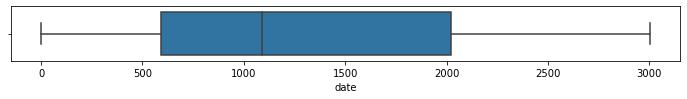

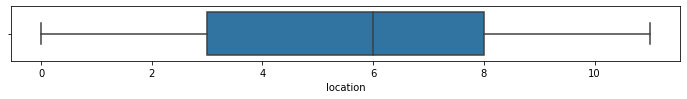

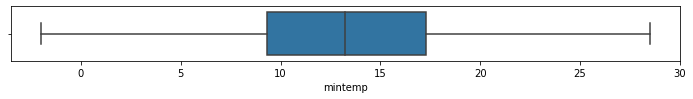

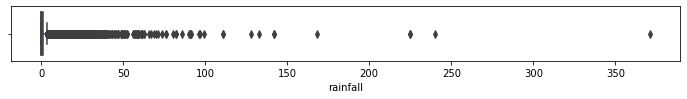

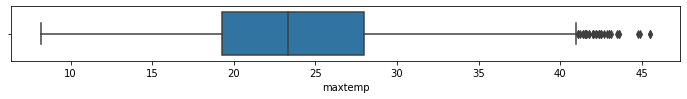

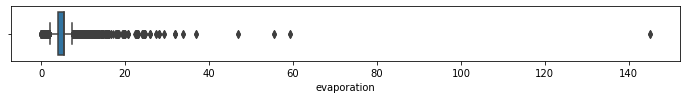

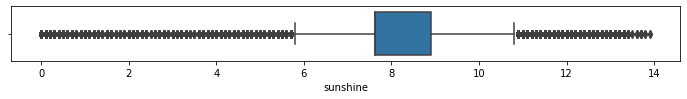

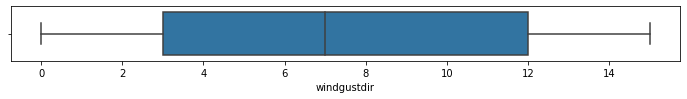

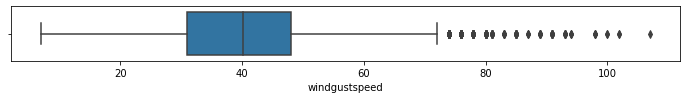

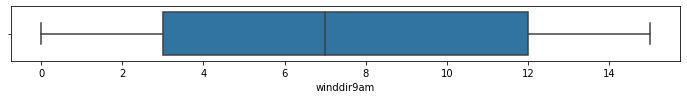

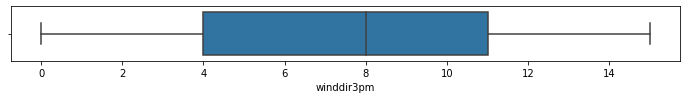

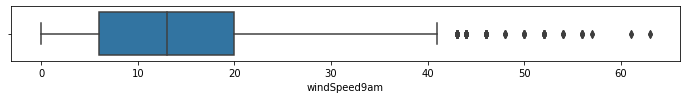

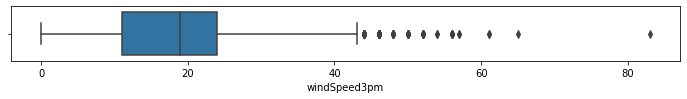

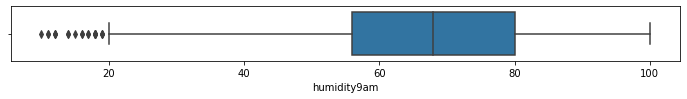

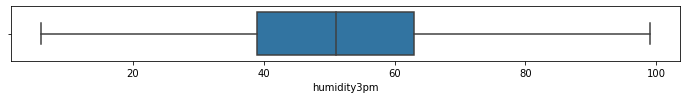

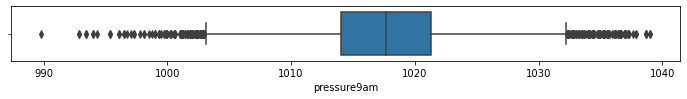

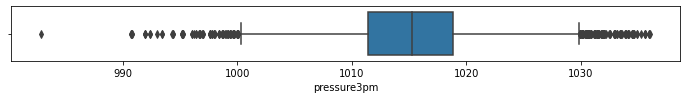

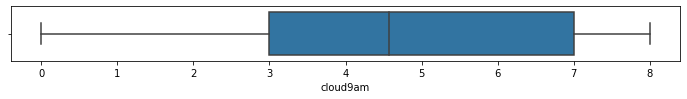

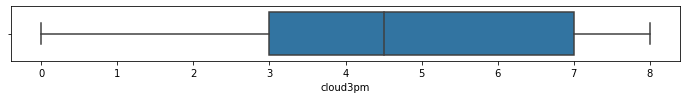

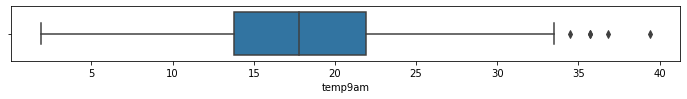

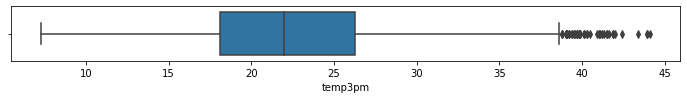

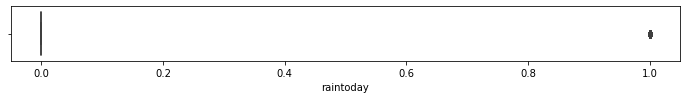

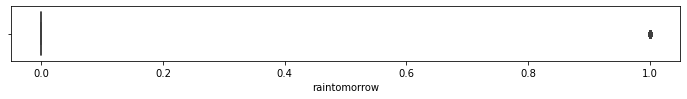

In [111]:
for i in df1.columns[0:23]:
 plt.figure (figsize = (12,1), facecolor = "white")
 sns.boxplot(x=i,data=df1)
 plt.show()

In [112]:
# here below we can find the outliers for all the cloumns by using boxplot.
# and we found outliers in :
# maxtemp, Evaporation, Sunshine, windgustspeed, windspeed9am & 3pm, Pressure 9am & 3pm, Temp 9am & 3pm
# are having outliers.
# so out of 23 columns we found OUTLIERS IN 10 COLUMNS , now we have to remove those outliers from out dataset.

REMOVING OF OUTLIERS BY USING Z-SCORE METHOD

In [113]:
# For Removing Outliers, first we need to identify the ZSCORE VALUES, for which we have to import some libraries.
from scipy.stats import zscore
z = np.abs(zscore(df1))
z.head(5)

,date,location,mintemp,rainfall,maxtemp,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,1.517879,1.515776,0.038425,0.213986,0.157009,2.305893e-16,3.143679e-16,1.229643,0.277710,1.249535,...,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,0.556099,0.556282
1,1.516709,1.515776,1.076989,0.272189,0.202812,2.305893e-16,3.143679e-16,1.442303,0.277710,0.276260,...,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,0.556099,0.556282
2,1.515538,1.515776,0.054526,0.272189,0.300945,2.305893e-16,3.143679e-16,1.654964,0.422897,1.249535,...,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,0.556099,0.556282
3,1.514367,1.515776,0.742365,0.272189,0.677121,2.305893e-16,3.143679e-16,0.684299,1.174166,0.377652,...,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,0.556099,0.556282
4,1.513197,1.515776,0.800625,0.175183,1.380408,2.305893e-16,3.143679e-16,1.229643,0.059928,1.366114,...,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,0.556099,0.556282


In [114]:
# by applying 'abs' (absolute method), we are getting all the entries whose z-score value is positive side
# Ideally we can call the OUTLIERS whos ZSCORE VALUE is LESS THEN 3 AND MORE THEN 3
# so we have to remove all the data whose ZSCORE >3 & <3
# below here we apllying "abs" i.e absolute method it returns us the all zscore values greater then 3
# so we just need to remove lesserr then 3 zscore values.

In [115]:
threshold = 3
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
        683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
       2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
       3059, 3060, 3066, 3067, 3067, 3067, 3068, 3

In [116]:
df_new = df1[(z<3).all(axis=1)]
df_new

,date,location,mintemp,rainfall,maxtemp,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,0,1,13.4,0.6,22.900000,5.389395,7.632205,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,0.0,25.100000,5.389395,7.632205,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,0.0,25.700000,5.389395,7.632205,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,0.0,28.000000,5.389395,7.632205,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,1.0,32.300000,5.389395,7.632205,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,0.0,23.400000,5.389395,7.632205,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3000,9,3.6,0.0,25.300000,5.389395,7.632205,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,3001,9,5.4,0.0,26.900000,5.389395,7.632205,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,3002,9,7.8,0.0,27.000000,5.389395,7.632205,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [117]:
# here we can see the difference clearly that, earlier there was 8425 total rows are there, and now after removing outliers..
# ...there are only 7987 rows are present in our dataset.
# so there are 438 OUTLIERS are removed during this process.

In [118]:
print(df.shape)
print(df_new.shape)

(8425, 23)
(7987, 23)


 Here above we can clearly see the difference in dataset shape before and after removing OUTLIERS form the dataset.\nEarlier t
here was 8425 Rows are there and after removing outliers there are only 7987 Rows are remaining.\n\nSo There are [ 438 ] Outlie
rs are removed during the process.

CHECKING REMOVAL OF OUTLIERS BY BOXPLOT (COMPARING 'df1' & 'df_new')

In [119]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

**Obseravations:-**
1. Following are the Columns where outliers are present earlier :-
maxtemp, evaporation, Sunshine, windgustspeed, windspeed9am & 3pm, Pressure 9am & 3pm, Temp 9am & 3pm

 Analysing BEFORE & AFTER REMOVAL OF OUTLIERS (column by column)

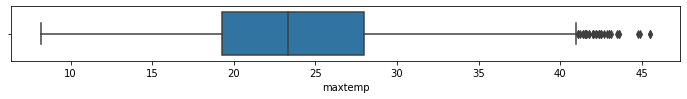

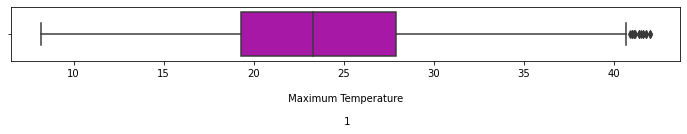

In [120]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='maxtemp',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='maxtemp',data=df_new, color='m')
plt.xlabel('\n Maximum Temperature \n\n 1')
plt.show()

**Observations:-**
1. Outliers are succesfully removed.
1. It is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
3. So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

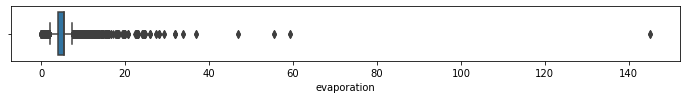

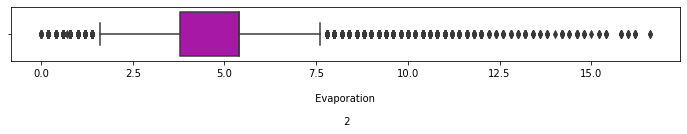

In [121]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='evaporation',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='evaporation',data=df_new, color='m')
plt.xlabel('\n Evaporation \n\n 2')
plt.show()

**Observations:-** 
1. Outliers are succesfully removed.
2. It is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
3. So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

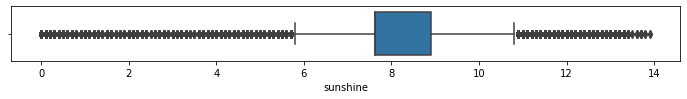

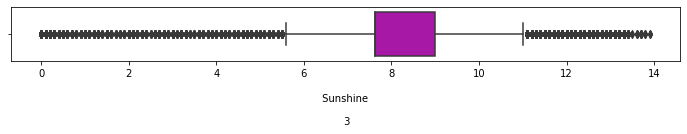

In [122]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='sunshine',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='sunshine',data=df_new, color='m')
plt.xlabel('\n Sunshine \n\n 3')
plt.show()


**Observations:-**
1. No Removal Of outliers From this Column.
2. It is the Newer (df_new dataset) NO OUTLIERS ARE REMOVED.


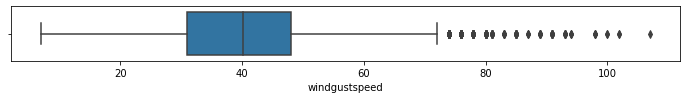

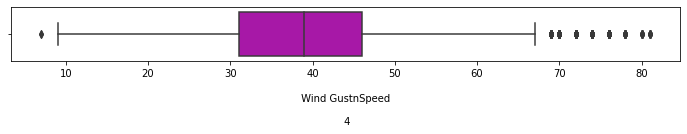

In [123]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windgustspeed',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windgustspeed',data=df_new, color='m')
plt.xlabel('\n Wind GustnSpeed \n\n 4')
plt.show()

**Observations:-** 
1. Outliers are succesfully removed.
2. It is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
3. So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

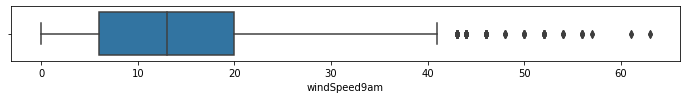

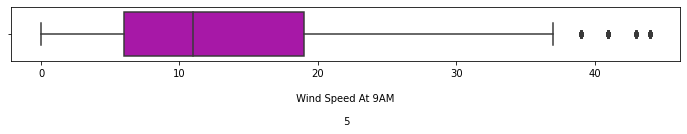

In [124]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windSpeed9am',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windSpeed9am',data=df_new, color='m')
plt.xlabel('\n Wind Speed At 9AM \n\n 5')
plt.show()

**Observations:-**  
1. Outliers are succesfully removed.
2. It is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
3. So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

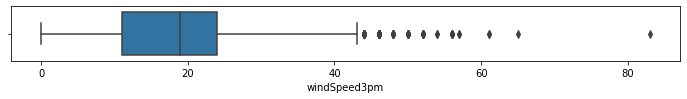

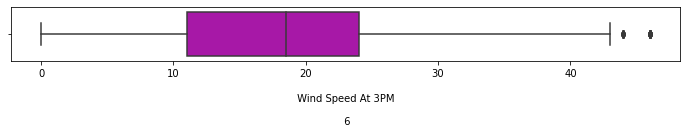

In [125]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windSpeed3pm',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windSpeed3pm',data=df_new, color='m')
plt.xlabel('\n Wind Speed At 3PM \n\n 6')
plt.show()


In [126]:
# outliers are succesfully removed.
# it is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

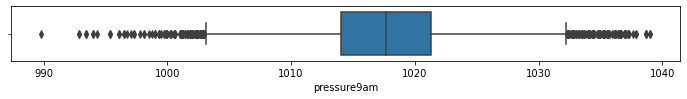

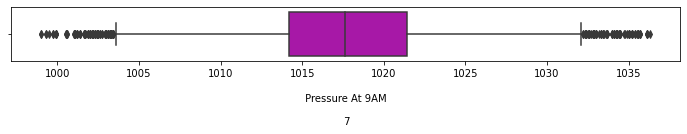

In [127]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pressure9am',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pressure9am',data=df_new, color='m')
plt.xlabel('\n Pressure At 9AM \n\n 7')
plt.show()


In [128]:
# outliers are succesfully removed.
# it is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

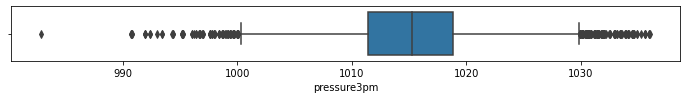

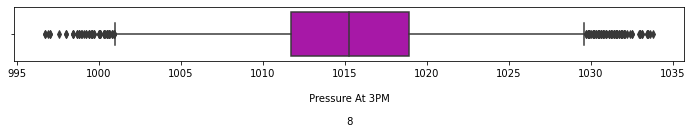

In [129]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pressure3pm',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pressure3pm',data=df_new, color='m')
plt.xlabel('\n Pressure At 3PM \n\n 8')
plt.show()

In [130]:
# outliers are succesfully removed.
# it is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

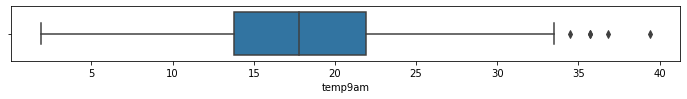

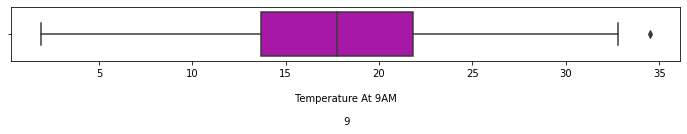

In [131]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='temp9am',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='temp9am',data=df_new, color='m')
plt.xlabel('\n Temperature At 9AM \n\n 9')
plt.show()

In [132]:
# outliers are succesfully removed.
# it is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

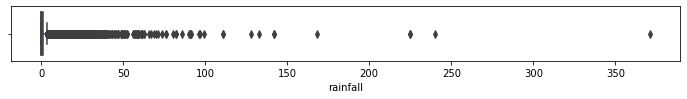

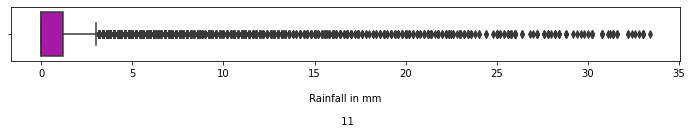

In [133]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='rainfall',data=df1)
plt.show()
# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='rainfall',data=df_new, color='m')
plt.xlabel('\n Rainfall in mm \n\n 11')
plt.show()

In [134]:
# outliers are succesfully removed.
# it is the Newer (df_new dataset) OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

THERE ARE TOTAL 330 OUTLIERS ARE REMOVED FROM 10 COLUMS SUCCESSFULLY

# Skewness

In [135]:
# the skewness shows the distribution of data, if the data is widely skewed that means it is not good for our model.
# ideal range of skewness is ( -0.5 to +0.5)
# We can't remove skewness from our Target Column
df_new.skew()
# here below we find any skewness in 'RAINFALL' in the data,
# there is little skewness is present in ' RAIN TODAY' , we Cant remove it. beaucse it a categorical columns where values are
# ..in only 'yes' or 'no'

date             0.398008
location        -0.040284
mintemp         -0.084549
rainfall         3.488446
maxtemp          0.314510
evaporation      0.846181
sunshine        -0.723970
windgustdir      0.112339
windgustspeed    0.506897
winddir9am       0.160081
winddir3pm      -0.126255
windSpeed9am     0.711395
windSpeed3pm     0.300109
humidity9am     -0.231656
humidity3pm      0.125150
pressure9am      0.020735
pressure3pm      0.044876
cloud9am        -0.356892
cloud3pm        -0.266829
temp9am         -0.038035
temp3pm          0.334170
raintoday        1.301170
raintomorrow     1.296077
dtype: float64

**DIVIDING DATA INTO INDEPENDENT & TARGET VARIABLE**

In [136]:
df_new.columns

Index(['date', 'location', 'mintemp', 'rainfall', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

**FOR CONDITION -1**

In [137]:
x1 = df_new[['date', 'location', 'mintemp', 'rainfall', 'maxtemp', 'evaporation',
 'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
 'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
 'temp3pm', 'raintoday']]


In [138]:
y1= df_new[['raintomorrow']]


**FOR CONDITION -2**

In [139]:
x2 = df_new[['date', 'location', 'mintemp', 'maxtemp', 'evaporation',
 'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
 'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
 'temp3pm', 'raintoday','raintomorrow']]


In [140]:
y2= df_new[['rainfall']]

In [141]:
print(x1.shape)
print(y1.shape)

(7987, 22)
(7987, 1)


In [142]:
print(x2.shape)
print(y2.shape)

(7987, 22)
(7987, 1)


**APPLYING SCALING TECHNIQUES**

In [143]:
# here we need to apply scaling techniques on our dataset,by scaling techniques we normalise the values.
# we can't apply SCALING TECHNIQUES on TARGET VARIABLE
# to aplly scaling techinuque we need to import some libraries first.
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

**APPLYING SCALING TECHNIQUES FOR CONDITION-1'**

In [144]:
x1 = st.fit_transform(x1)
x1

array([[-1.51886155, -1.50842735,  0.05644354, ..., -0.13809939,
        -0.09859334, -0.54247553],
       [-1.51768225, -1.50842735, -1.05847646, ..., -0.08425401,
         0.32974721, -0.54247553],
       [-1.51650296, -1.50842735, -0.03646646, ...,  0.59778751,
         0.14127737, -0.54247553],
       ...,
       [ 2.02020726,  1.02942282, -1.43011646, ..., -0.92783168,
         0.6381524 , -0.54247553],
       [ 2.02138656,  1.02942282, -0.98414846, ..., -0.46117169,
         0.62101878, -0.54247553],
       [ 2.02256586,  1.02942282,  0.33517354, ..., -0.47912015,
        -0.25279593, -0.54247553]])

In [145]:
xf1 = pd.DataFrame(data=x1)
print(xf1)
# here we get our dataset (xf1) after applying SCALING TECHING (STANDARD SCALER)

            0         1         2         3         4         5         6   \
0    -1.518862 -1.508427  0.056444 -0.282088 -0.145732  0.110484 -0.013374   
1    -1.517682 -1.508427 -1.058476 -0.408537  0.220676  0.110484 -0.013374   
2    -1.516503 -1.508427 -0.036466 -0.408537  0.320605  0.110484 -0.013374   
3    -1.515324 -1.508427 -0.724000 -0.408537  0.703668  0.110484 -0.013374   
4    -1.514144 -1.508427  0.818306 -0.197789  1.419829  0.110484 -0.013374   
...        ...       ...       ...       ...       ...       ...       ...   
7982  2.017849  1.029423 -1.913248 -0.408537 -0.062457  0.110484 -0.013374   
7983  2.019028  1.029423 -1.764592 -0.408537  0.253986  0.110484 -0.013374   
7984  2.020207  1.029423 -1.430116 -0.408537  0.520464  0.110484 -0.013374   
7985  2.021387  1.029423 -0.984148 -0.408537  0.537119  0.110484 -0.013374   
7986  2.022566  1.029423  0.335174 -0.408537  0.014151  0.110484 -0.013374   

            7         8         9   ...        12        13    

In [146]:
xf1.columns

RangeIndex(start=0, stop=22, step=1)

In [147]:
column = ['date', 'location','rainfall', 'mintemp', 'maxtemp', 'evaporation', 'sunshine',
 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
 'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
 'temp3pm', 'raintoday']

In [148]:
xf1.columns = column

In [149]:
yf1 = y1
# assigning y1 (target column to yf1)

In [150]:
xf1.columns

Index(['date', 'location', 'rainfall', 'mintemp', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday'],
      dtype='object')

In [151]:
yf1.head(2)

,raintomorrow
0,0
1,0


In [152]:
print(xf1.shape)
print(yf1.shape)

(7987, 22)
(7987, 1)


In [153]:
y1['raintomorrow'].nunique()

2

In [154]:
yf1.value_counts()

raintomorrow
0               6165
1               1822
dtype: int64

**APPLYING SCALING TECHNIQUES FOR CONDITION-2**

In [155]:
x2 = st.fit_transform(x2)
x2

array([[-1.51886155, -1.50842735,  0.05644354, ..., -0.09859334,
        -0.54247553, -0.5436353 ],
       [-1.51768225, -1.50842735, -1.05847646, ...,  0.32974721,
        -0.54247553, -0.5436353 ],
       [-1.51650296, -1.50842735, -0.03646646, ...,  0.14127737,
        -0.54247553, -0.5436353 ],
       ...,
       [ 2.02020726,  1.02942282, -1.43011646, ...,  0.6381524 ,
        -0.54247553, -0.5436353 ],
       [ 2.02138656,  1.02942282, -0.98414846, ...,  0.62101878,
        -0.54247553, -0.5436353 ],
       [ 2.02256586,  1.02942282,  0.33517354, ..., -0.25279593,
        -0.54247553, -0.5436353 ]])

In [156]:
xf2 = pd.DataFrame(data=x2)
print(xf2)
# here we get our dataset (xf2) after applying SCALING TECHING (STANDARD SCALER)

            0         1         2         3         4         5         6   \
0    -1.518862 -1.508427  0.056444 -0.145732  0.110484 -0.013374  1.229267   
1    -1.517682 -1.508427 -1.058476  0.220676  0.110484 -0.013374  1.441960   
2    -1.516503 -1.508427 -0.036466  0.320605  0.110484 -0.013374  1.654654   
3    -1.515324 -1.508427 -0.724000  0.703668  0.110484 -0.013374 -0.684977   
4    -1.514144 -1.508427  0.818306  1.419829  0.110484 -0.013374  1.229267   
...        ...       ...       ...       ...       ...       ...       ...   
7982  2.017849  1.029423 -1.913248 -0.062457  0.110484 -0.013374 -1.535751   
7983  2.019028  1.029423 -1.764592  0.253986  0.110484 -0.013374 -0.259589   
7984  2.020207  1.029423 -1.430116  0.520464  0.110484 -0.013374 -0.897670   
7985  2.021387  1.029423 -0.984148  0.537119  0.110484 -0.013374  0.378492   
7986  2.022566  1.029423  0.335174  0.014151  0.110484 -0.013374 -0.897670   

            7         8         9   ...        12        13    

In [157]:
xf2.columns

RangeIndex(start=0, stop=22, step=1)

In [158]:
column2 = ['date', 'location', 'mintemp', 'maxtemp', 'evaporation',
 'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
 'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
 'temp3pm', 'raintoday','raintomorrow']


In [159]:
xf2.columns = column2

In [160]:
yf2=y2

In [161]:
xf2.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [162]:
yf2.head(2)

,rainfall
0,0.6
1,0.0


In [163]:
print(xf2.shape)
print(yf2.shape)

(7987, 22)
(7987, 1)


In [164]:
y2['rainfall'].nunique()

171

In [165]:
y2.value_counts()

rainfall 
0.000000     5071
0.200000      390
2.805913      232
0.400000      176
0.600000      115
             ... 
26.800000       1
22.800000       1
6.300000        1
23.800000       1
33.400000       1
Length: 171, dtype: int64

FINDING MULTICOLINEARITY

In [166]:
# We have to find the multicollinearity between the features and to remove it we can use VIF (VARIANCE INFLATION FACTOR)
# we can not apply VIF on the TARGET COLUMN
# for apllyin VIF we have to import some libraries as follows

In [167]:
import statsmodels.api as sm
from scipy import stats
from statsmodels .stats.outliers_influence import variance_inflation_factor

CALCULATING VIF FOR CONDITION-1'

In [168]:
# here we are making "def function" for calculating VIF
def calc_vif(xf1):
 vif = pd.DataFrame()
 vif["FETURES"] = xf1.columns
 vif["VIF FACTOR"] = [variance_inflation_factor(xf1.values,i) for i in range (xf1.shape[1])]
 return (vif)

In [169]:
calc_vif(xf1)
# here we can't find any HIGHER Multicolinearity in our dataset

,FETURES,VIF FACTOR
0,date,1.481534
1,location,1.543485
2,rainfall,8.554876
3,mintemp,1.953926
4,maxtemp,26.363719
5,evaporation,1.543202
6,sunshine,1.939156
7,windgustdir,1.614334
8,windgustspeed,2.313953
9,winddir9am,1.352454


 here above we find the MultiCollinearity, and we found that the Highest Multicollinearity is at ['temp3pm'] & ['maxtemp']\nbo
th the columns Min-temp,Max-temp are correlated with Temp-9am, temp_3pm are showing Multicollinearity & also showing\nthe repea
ted values of tempreature. So we can drop any one of them.

In [170]:
xf1.drop(['temp3pm'],axis=1,inplace=True)

In [171]:
xf1.drop(['temp9am'],axis=1,inplace=True)

In [172]:
calc_vif(xf1)
# the Highest Multicollinearity is successfully reduced.

,FETURES,VIF FACTOR
0,date,1.454183
1,location,1.540309
2,rainfall,4.593034
3,mintemp,1.951865
4,maxtemp,5.757207
5,evaporation,1.537367
6,sunshine,1.930888
7,windgustdir,1.610235
8,windgustspeed,2.264126
9,winddir9am,1.351331


HERE ABOVE WE CAN CLEALRY SEE THE DIFFERENCE
Now there is not much any higher VIF VALUE that means our dataset is not MULTICOLLINEARED NOW
and we can apply the further operations on our dataset for the prediction.

CALULATING VIF FOR CONDITION-2

In [173]:
# here we are making "def function" for calculating VIF
def calc_vif(xf2):
 vif = pd.DataFrame()
 vif["FETURES"] = xf2.columns
 vif["VIF FACTOR"] = [variance_inflation_factor(xf2.values,i) for i in range (xf2.shape[1])]
 return (vif)

In [174]:
calc_vif(xf2)


,FETURES,VIF FACTOR
0,date,1.485559
1,location,1.553178
2,mintemp,8.567086
3,maxtemp,26.371041
4,evaporation,1.543206
5,sunshine,1.956736
6,windgustdir,1.616491
7,windgustspeed,2.392374
8,winddir9am,1.351125
9,winddir3pm,1.482830


here above also we find the MultiCollinearity, and we found that the Highest Multicollinearity is at ['temp3pm'] &
['maxtemp'] both the columns Min-temp,Max-temp are correlated with Temp-9am, temp_3pm are showing Multicollinearity &
also showing the repeated values of tempreature. So we can drop any one of them.

In [175]:
xf2.drop(['temp3pm'],axis=1,inplace=True)

In [176]:
xf2.drop(['temp9am'],axis=1,inplace=True)

In [177]:
calc_vif(xf2)
# the Highest Multicollinearity is successfully reduced

,FETURES,VIF FACTOR
0,date,1.457993
1,location,1.550070
2,mintemp,4.606410
3,maxtemp,5.772393
4,evaporation,1.537391
5,sunshine,1.948460
6,windgustdir,1.612358
7,windgustspeed,2.343624
8,winddir9am,1.350069
9,winddir3pm,1.480588


CONCLUSION = Here above we apply the same Procedure for CONDITION-1 & 2 because we are having 2 different datasets with name of
 XF1 & YF1, XF2 & YF2 therefore we need to apply same repeated procedure for both of the dataset

INITIATING RESAMPLING TECHNIQUE (APPLYING SMOTE FOR ONLY CONDITION-1)

In [178]:
# Here we know that our Target Column is a Categorical column. which is having values from 0-1.
# so we have to chek the distribution of values are equal or not, offcourse i would be not, so we have to make them equally
# 'equally balanced distributed' for better results.
# SOLVING CLASS IMMBALANCE PROBLEM BY SMOTE TECHNIQUE.


In [179]:
xf1.columns

Index(['date', 'location', 'rainfall', 'mintemp', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'raintoday'],
      dtype='object')

In [180]:
print(xf1.shape)
print(xf2.shape)
print(y1.shape)
print(y2.shape)

(7987, 20)
(7987, 20)
(7987, 1)
(7987, 1)


In [181]:
yf1.value_counts()
# IT CAN BE BALANCABLE BY SMOTE

raintomorrow
0               6165
1               1822
dtype: int64

In [182]:
yf2.value_counts()
#
# HERE IT A CONTINEOUS DATA WHICH CAN'T BE BALANCABLE WITH SMOTE

rainfall 
0.000000     5071
0.200000      390
2.805913      232
0.400000      176
0.600000      115
             ... 
26.800000       1
22.800000       1
6.300000        1
23.800000       1
33.400000       1
Length: 171, dtype: int64

Here above we can find the IMMBALANCE OF DATA DISTRIBUTION IN CATEGORIES
To solve this prolem we need import SMOTE LIBRARY from the IMBLEARN.

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
smt = SMOTE()

In [185]:
trainx1, trainy1 = smt.fit_resample(xf1,yf1)

In [186]:
trainy1.value_counts()
# here as you can see below the immbalanceness is cleared now.
# and now our Target Column Categories are BALANCED NOW.


raintomorrow
0               6165
1               6165
dtype: int64

In [187]:
print(xf1.shape)
print(yf1.shape)
print(trainx1.shape)
print(trainy1.shape)

(7987, 20)
(7987, 1)
(12330, 20)
(12330, 1)


ABOVE WE CAN SEE THE DIFFERENCE AFTER APPLYING SAMPLING TECHINIQUE, VALUE COUNTS OF CATEGORIES OF['YF1'] ARE EQUAL
 NOW ,WHICH WILL HELP OUR MODEL FOR BETTER PREDICTION.
AFTER APPLYING RESAMPLING TECHNIQUES, NUMBER OF ROWS ARE INCREASED FROM 7987 TO 12,330

'NOW WE ARE HAVING 2 GIVEN CONDITIONS :-
1.  CONDITION-1 = WHERE TARGET COLUMN IS ['RAIN TOMORROW'] => HERE WE NEED TO APPLY CLASSIFICATION MODEL
 (because target column is CATEGORICAL)

2.  CONDITION-2 = WHERE TARGET COLUMN IS ['RAINFALL'] => HERE WE NEED TO APPLY REGRESSION MODEL
 (because target column is 'CONITNEOUS' NUMERICAL )

 SO OVERALL POINT IS THAT, WE NEED TO BUILD TWO MODEL, MODEL-1 IS CLASSIFICATIN MODEL & MODEL-2 IS REGRESSION MODEL

**APPLYING CLASSIFICATION ML-MODEL (CONDITION-1)**

In [188]:
# Applying TRAIN_TEST_SPLIT ====>>>
# IMPORTING SOME IMPORTANT REQUIIRED LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [189]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [190]:
model = [lg,gnb,svc,dtc,knn]

**1) FINDING BEST RANDOM STATE WITH MODEL-1**

In [191]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test,pred)

    if acc > maxaccu :
        maxaccu = acc
        maxrs = i

print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lg)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best accuracy is 0.7984590429845905 at random state 5
with Best Fitted Model is : LogisticRegression()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**2) FINDING BEST RANDOM STATE WITH MODEL-2**

In [192]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=i)
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)
    pred = gnb.predict(x_test)
    acc = accuracy_score(y_test,pred)

    if acc > maxaccu :
        maxaccu = acc
        maxrs = i

print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",gnb)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best accuracy is 0.7623682076236821 at random state 142
with Best Fitted Model is : GaussianNB()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**FINDING BEST RANDOM STATE WITH MODEL-3**

In [195]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=i)
    dtc = DecisionTreeClassifier(criterion="entropy")
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    acc = accuracy_score(y_test,pred)

    if acc > maxaccu :
        maxaccu = acc
        maxrs = i

print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",dtc)

Best accuracy is 0.8998377939983779 at random state 16
with Best Fitted Model is : DecisionTreeClassifier(criterion='entropy')


**4) FINDING BEST RANDOM STATE WITH MODEL-4**

In [ ]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = accuracy_score(y_test,pred)

    if acc > maxaccu :
        maxaccu = acc
        maxrs = i

print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",knn)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

HERE FROM THE ALL OF THE ABOVE MODELS , WE ARE GETTING HIGHEST ACCURACY FROM - DECISIONTREE CLASSIFIER MODEL
 WITH BEST RANDOM STATE OF 156